In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import IncrementalPCA, MiniBatchNMF, KernelPCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.model_selection import (
    RandomizedSearchCV,
    StratifiedKFold,
    train_test_split,
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,

    f1_score,

)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from collections import defaultdict
from sklearn.utils import resample

from collections import Counter
import itertools


import warnings
from tqdm.notebook import tqdm
from sklearn.base import clone

/Users/rikard/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:


file_path = 'data/MyMNIST.csv'
data = pd.read_csv(file_path)

images = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values





del data # remove


/Users/rikard/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## a)

In [2]:


def incremental_pca(images, n_components, batch_size=10000):
    ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
    return ipca.fit_transform(images), ipca

def tsne(images, n_components):
    tsne = TSNE(n_components=n_components)
    return tsne.fit_transform(images), tsne


def mini_batch_nmf(images, n_components):
    nmf = MiniBatchNMF(n_components=n_components, batch_size=10000)
    return nmf.fit_transform(images), nmf

def kpca(images, n_components):
    kpca = KernelPCA(n_components=n_components, kernel='rbf')
    return kpca.fit_transform(images), kpca

def random_subsample(shape, n_samples):
    return np.random.choice(shape[0], n_samples, replace=False)




def plot_images(images, labels, n=10):
    fig, axes = plt.subplots(1, n, figsize=(20, 4))
    for i in range(n):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()


def plot_components(transformed, labels, title='Components plot'):
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))
    axes[0].scatter(transformed[:, 0], transformed[:, 1], c=labels, cmap='tab10', alpha=1, s=1)
    axes[1].scatter(transformed[:, 2], transformed[:, 3], c=labels, cmap='tab10', alpha=1, s=1)
    axes[2].scatter(transformed[:, 3], transformed[:, 4], c=labels, cmap='tab10', alpha=1, s=1)
    
    fig.colorbar(axes[0].scatter(transformed[:, 0], transformed[:, 1], c=labels, cmap='tab10', alpha=1, s=1), ax=axes[0])
    fig.colorbar(axes[1].scatter(transformed[:, 2], transformed[:, 3], c=labels, cmap='tab10', alpha=1, s=1), ax=axes[1])
    fig.colorbar(axes[2].scatter(transformed[:, 3], transformed[:, 4], c=labels, cmap='tab10', alpha=1, s=1), ax=axes[2])
    
    plt.suptitle(title)
    
    axes[0].set_title('Component 1 vs 2')
    axes[1].set_title('Component 3 vs 4')
    axes[2].set_title('Component 4 vs 5')
    
    axes[0].set_xlabel('Component 1')
    axes[0].set_ylabel('Component 2')
    
    axes[1].set_xlabel('Component 3')
    axes[1].set_ylabel('Component 4')
    
    axes[2].set_xlabel('Component 4')
    axes[2].set_ylabel('Component 5')
    
    plt.show()

def plot_components_heatmap(components, n=10, title='Components heatmap'):
    components = components.reshape(-1, 28, 28)
    fig, axes = plt.subplots(1, n, figsize=(15, 4))
    for i in range(n):
        axes[i].imshow(components[i], cmap='hot')
        axes[i].set_title(f'{i}th component')
        axes[i].axis('off')
        
        plt.colorbar(axes[i].imshow(components[i], cmap='hot'), ax=axes[i])
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
    
    



In [ ]:
# #scree plot
# # pca = IncrementalPCA(n_components=784)
# # pca.fit(images)
# plt.figure(figsize=(10, 5))
# plt.plot(pca.explained_variance_ratio_)
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.title("Scree")
# plt.show()


In [ ]:

def plot_dimension_reduction(images, labels, n_components=50):
    dimensions = images.shape[1]
    transformed, algo = incremental_pca(images, n_components)
    plot_components(transformed, labels, title="Incremental PCA")
    if dimensions == 784:
        plot_components_heatmap(algo.components_, title='Incremental PCA components', n=5)
    
    transformed, algo = mini_batch_nmf(images, n_components)
    plot_components(transformed, labels, title="MiniBatch NMF")
    if dimensions == 784:
        plot_components_heatmap(algo.components_, title='MiniBatch NMF components', n=5)
    
    
    subsampled_idx = random_subsample(images.shape, 10000)

    subsampled_images = images[subsampled_idx]
    subsampled_labels = labels[subsampled_idx]
    
    transformed, algo = kpca(subsampled_images, 2)
    plt.scatter(transformed[:, 0], transformed[:, 1], c=subsampled_labels, cmap='tab10', s=2)
    plt.colorbar()
    plt.xlabel('component 0')
    plt.ylabel('component 1')
    plt.title('KPCA')
    plt.show()
    
    transformed, algo = tsne(subsampled_images, 2)
    plt.scatter(transformed[:, 0], transformed[:, 1], c=subsampled_labels, cmap='tab10', s=2)
    plt.colorbar()
    plt.xlabel('component 0')
    plt.ylabel('component 1')
    plt.title('TSNE')
    plt.show()

plot_dimension_reduction(images, labels)

In [ ]:
filtered = SelectKBest(f_classif, k=100).fit_transform(images, labels)

plot_dimension_reduction(filtered, labels, n_components=50)

## b)


In [17]:



warnings.filterwarnings("ignore")


def create_classifiers(class_weight: str = "balanced"):
    classifiers = {
        "Logistic Regression": LogisticRegression(class_weight=class_weight, n_jobs=-1),
        "SVM with Linear Kernel": SVC(kernel="linear", class_weight=class_weight, probability=True),
        "Random Forest": RandomForestClassifier(class_weight=class_weight, n_jobs=-1),
        "Decision Tree": DecisionTreeClassifier(class_weight=class_weight),
        "k-NN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    }

    return classifiers

def majority_vote(clfs, images):
    predictions = []
    for clf in clfs:
        predictions.append(clf.predict(images))
    predictions = np.array(predictions)
    return np.array([Counter(predictions[:, i]).most_common(1)[0][0] for i in range(images.shape[0])])



def run_training_loop(
    X_train,
    y_train,
    X_test,
    y_test,
    batch_size: int = 1000,
    class_weight: str = "balanced",
    verbose: bool = False,
    average="micro",
):
    # Define classifiers
    classifiers = create_classifiers(class_weight=class_weight)

    # Stratified K-Fold Cross Validation
    skf = StratifiedKFold(n_splits=10, shuffle=True)

    # Metrics storage
    results = {
        name: {
            "accuracy": [],
            "f1_score": [],
            "f1_macro": [],
            "mispredictions": [],
            "predictions": [],
            "true_labels": []
        }
        for name in classifiers.keys()
    }
    
    results_test = {
        name: {
            "accuracy": [],
            "f1_score": [],
            "f1_macro": [],
            "mispredictions": [],
            "predictions": [],
            "true_labels": []
        }
        for name in classifiers.keys()
    }
    n_classes = len(np.unique(y_train))

    aggregate_conf_matrix_train = {name: np.zeros((n_classes, n_classes)) for name in classifiers.keys()}

    for train_index, val_index in skf.split(X_train, y_train):
        X_cv, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_cv, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # re init classifiers to prevent data leakage from previous fold
        classifiers= create_classifiers(class_weight=class_weight)
        num_classifiers = len(X_cv) // batch_size
        for name, clf in tqdm(classifiers.items(), desc="Training classifiers", position=0, leave=False, disable=not verbose):
            # if name != "Logistic Regression": continue
            # create a list of classifiers to aggregate and use for majority voting
            
            clfs = [clone(clf) for _ in range(num_classifiers)]
            
            for i in range(num_classifiers):
                X_batch = X_cv.iloc[i*batch_size:(i+1)*batch_size]
                y_batch = y_cv.iloc[i*batch_size:(i+1)*batch_size]
                clfs[i].fit(X_batch, y_batch)
            
    

            # Predict
            y_pred = majority_vote(clfs, X_val)

            # Calculate metrics
            acc = accuracy_score(y_val, y_pred)
            f1 = f1_score(y_val, y_pred, average=average)
            f1_macro = f1_score(y_val, y_pred, average="macro")

            conf_matrix = confusion_matrix(y_val, y_pred, labels=np.unique(y_train))
            aggregate_conf_matrix_train[name] += conf_matrix

            mispreds = y_val[y_val != y_pred].index
            
            # Store metrics
            results[name]["accuracy"].append(acc)
            results[name]["f1_score"].append(f1)
            results[name]["f1_macro"].append(f1_macro)
            results[name]["mispredictions"].append(mispreds)
            results[name]["predictions"].append(y_pred)
            results[name]["true_labels"].append(y_val)

    num_classifiers = len(X_train) // batch_size
    for name, clf in tqdm(classifiers.items(), desc="Training classifiers", position=0, leave=False, disable=not verbose):
        # if name != "Logistic Regression": continue
        
        clfs = [clone(clf) for _ in range(num_classifiers)]
        
        for i in range(num_classifiers):
            X_batch = X_train.iloc[i*batch_size:(i+1)*batch_size]
            y_batch = y_train.iloc[i*batch_size:(i+1)*batch_size]
            clfs[i].fit(X_batch, y_batch)
            
        y_pred = majority_vote(clfs, X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average=average)
        f1_macro = f1_score(y_test, y_pred, average="macro")
        conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))
        mispreds = y_test[y_test != y_pred].index
        results_test[name]["accuracy"].append(acc)
        results_test[name]["f1_score"].append(f1)
        results_test[name]["f1_macro"].append(f1_macro)
        results_test[name]["mispredictions"].append(mispreds)
        results_test[name]["predictions"].append(y_pred)
        results_test[name]["true_labels"].append(y_test)
    return results, aggregate_conf_matrix_train, results_test

In [3]:
file_path = 'data/MyMNIST.csv'
data = pd.read_csv(file_path)

images = data.iloc[:, 1:]
labels = data.iloc[:, 0]


del data # remove

print("Distribution of classes: ", np.bincount(labels))
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels, random_state=42)
print("Distribution of classes in training set: ", np.bincount(y_train))

reducer =  SelectKBest(f_classif, k=100)
reduced = reducer.fit_transform(X_train, y_train)

reduced_test = reducer.transform(X_test)


reduced, algo = incremental_pca(reduced, 50)



Distribution of classes:  [4915 5621 4971 5129 4847 4545 4920 5211 4910 4931]
Distribution of classes in training set:  [3932 4497 3977 4103 3877 3636 3936 4169 3928 3945]


In [18]:
all_results = []
all_conf_matrices = []
all_results_test = []

for _ in range(3):
    X_train_resampled, y_train_resampled = resample(X_train, y_train)
    for test_size in [0.1, 0.5,  0.8]:
        X_train_temp, _, y_train_temp, _ = train_test_split(X_train_resampled, y_train_resampled, test_size=test_size, stratify=y_train, random_state=42)
        print("Distribution of classes in training set: ", np.bincount(y_train))
        print("Distribution of classes in test set: ", np.bincount(y_test))
        train_size = 0.8 * (1 - test_size)
        print("Proportion of training set used: ", train_size)
        reduced = reducer.fit_transform(X_train_temp, y_train_temp)
        reduced_test = reducer.transform(X_test)
        reduced, algo = incremental_pca(reduced, 50)
        
        reduced_test = algo.transform(reduced_test)
        
        results, conf_matrix, results_test = run_training_loop(pd.DataFrame(reduced), y_train_temp, reduced_test, y_test, class_weight="balanced", average=None)
        results["train_size"] = train_size
        all_results.append(results)
        all_conf_matrices.append(conf_matrix)
        results_test["train_size"] = train_size
        all_results_test.append(results_test)
    


Distribution of classes in training set:  [3932 4497 3977 4103 3877 3636 3936 4169 3928 3945]
Distribution of classes in test set:  [ 983 1124  994 1026  970  909  984 1042  982  986]
Proportion of training set used:  0.7200000000000001


/Users/rikard/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/rikard/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/rikard/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/rikard/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings

Distribution of classes in training set:  [3932 4497 3977 4103 3877 3636 3936 4169 3928 3945]
Distribution of classes in test set:  [ 983 1124  994 1026  970  909  984 1042  982  986]
Proportion of training set used:  0.4
Distribution of classes in training set:  [3932 4497 3977 4103 3877 3636 3936 4169 3928 3945]
Distribution of classes in test set:  [ 983 1124  994 1026  970  909  984 1042  982  986]
Proportion of training set used:  0.15999999999999998
Distribution of classes in training set:  [3932 4497 3977 4103 3877 3636 3936 4169 3928 3945]
Distribution of classes in test set:  [ 983 1124  994 1026  970  909  984 1042  982  986]
Proportion of training set used:  0.7200000000000001
Distribution of classes in training set:  [3932 4497 3977 4103 3877 3636 3936 4169 3928 3945]
Distribution of classes in test set:  [ 983 1124  994 1026  970  909  984 1042  982  986]
Proportion of training set used:  0.4
Distribution of classes in training set:  [3932 4497 3977 4103 3877 3636 3936 416

In [19]:
def create_df(data, folds=10):
    flattened_data = []
    train_sizes = []
    for d in data:
        for model, metrics in d.items():
            if model == "train_size":
                train_sizes.extend([metrics] * folds) # size of folds
            else:
                for metric, values in metrics.items():
                    if isinstance(values, list):
                        
                        for i, value in enumerate(values):
                            flattened_data.append({
                                'Model': model,
                                'Metric': metric,
                                'Run': i,
                                'Value': value
                            })
                    else:
                        flattened_data.append({
                            'Model': model,
                            'Metric': metric,
                            'Run': 0,
                            'Value': values
                        })

    # Create the DataFrame
    df = pd.DataFrame(flattened_data)
    df_wide = pd.DataFrame()
    for model, group in df.groupby('Model'):
        for metric, values in group.groupby('Metric')['Value'].agg(list).items():
            col_name = f"{metric}_{model}"

            df_wide[col_name] = values

    # Add train size columns
    df_wide["train_size"] = train_sizes
    df_wide = df_wide.reset_index(drop=True)

    
    return df_wide





df = create_df(all_results)
df

,accuracy_Decision Tree,f1_macro_Decision Tree,f1_score_Decision Tree,mispredictions_Decision Tree,predictions_Decision Tree,true_labels_Decision Tree,accuracy_Logistic Regression,f1_macro_Logistic Regression,f1_score_Logistic Regression,mispredictions_Logistic Regression,...,mispredictions_SVM with Linear Kernel,predictions_SVM with Linear Kernel,true_labels_SVM with Linear Kernel,accuracy_k-NN,f1_macro_k-NN,f1_score_k-NN,mispredictions_k-NN,predictions_k-NN,true_labels_k-NN,train_size
0,0.733056,0.725538,"[0.8681318681318682, 0.9022379269729093, 0.643...","Int64Index([25560, 10909, 49158, 38078, 48066,...","[8, 9, 5, 7, 1, 5, 2, 1, 2, 7, 7, 5, 1, 0, 3, ...",30676 8 35460 9 25560 9 2533 7 38...,0.739722,0.731740,"[0.9085794655414908, 0.9045346062052506, 0.644...","Int64Index([30676, 25560, 9652, 49158, 48066,...",...,"Int64Index([25560, 9652, 49158, 48066, 20645,...","[8, 9, 5, 7, 1, 3, 0, 1, 2, 7, 7, 2, 1, 0, 3, ...",30676 8 35460 9 25560 9 2533 7 38...,0.791389,0.783384,"[0.8886010362694301, 0.8523206751054853, 0.750...","Int64Index([30676, 25560, 9652, 38078, 48066,...","[3, 9, 5, 7, 1, 3, 0, 1, 8, 7, 7, 0, 1, 0, 3, ...",30676 8 35460 9 25560 9 2533 7 38...,0.72
1,0.720000,0.711177,"[0.8552097428958051, 0.8747152619589977, 0.640...","Int64Index([48033, 30815, 35854, 21987, 2041,...","[4, 3, 7, 6, 1, 3, 8, 9, 2, 0, 9, 9, 1, 9, 0, ...",4199 4 48033 2 37583 7 30815 3 14...,0.719444,0.711467,"[0.8923076923076924, 0.886337543053961, 0.6089...","Int64Index([21987, 2041, 39606, 13750, 37489,...",...,"Int64Index([21987, 2041, 39606, 13750, 37489,...","[4, 2, 7, 3, 1, 3, 6, 9, 2, 0, 9, 9, 1, 9, 0, ...",4199 4 48033 2 37583 7 30815 3 14...,0.778333,0.770965,"[0.8862745098039215, 0.8277268093781855, 0.703...","Int64Index([21987, 2041, 46345, 38009, 39606,...","[4, 2, 7, 3, 1, 3, 6, 9, 2, 0, 9, 9, 1, 9, 0, ...",4199 4 48033 2 37583 7 30815 3 14...,0.72
2,0.734444,0.725897,"[0.8493150684931506, 0.8812785388127854, 0.632...","Int64Index([13892, 18923, 10197, 33684, 40726,...","[2, 1, 8, 1, 8, 5, 4, 0, 7, 2, 7, 5, 4, 0, 0, ...",45859 2 11051 1 13892 0 33449 1 51...,0.733889,0.724999,"[0.8758716875871687, 0.8942528735632184, 0.623...","Int64Index([13892, 39139, 40825, 18923, 10197,...",...,"Int64Index([26754, 39139, 40825, 18923, 10197,...","[2, 1, 0, 1, 8, 2, 4, 0, 6, 1, 7, 5, 5, 0, 0, ...",45859 2 11051 1 13892 0 33449 1 51...,0.778889,0.769512,"[0.8848167539267016, 0.84375, 0.67912772585669...","Int64Index([40825, 18923, 10197, 40726, 28727,...","[2, 1, 0, 1, 8, 5, 4, 0, 7, 1, 7, 5, 5, 0, 0, ...",45859 2 11051 1 13892 0 33449 1 51...,0.72
3,0.733333,0.726822,"[0.8681318681318682, 0.8810068649885584, 0.677...","Int64Index([ 7854, 38836, 27384, 30621, 30934,...","[9, 3, 3, 6, 1, 9, 1, 5, 5, 2, 0, 4, 1, 0, 9, ...",44570 9 7854 6 38836 8 27384 4 23...,0.725556,0.718164,"[0.8727272727272727, 0.8927738927738927, 0.649...","Int64Index([44570, 7854, 38836, 27384, 30621,...",...,"Int64Index([44570, 7854, 38836, 30621, 30934,...","[6, 3, 3, 4, 1, 9, 1, 5, 5, 0, 0, 4, 1, 0, 9, ...",44570 9 7854 6 38836 8 27384 4 23...,0.786667,0.780521,"[0.9110512129380054, 0.8368200836820083, 0.739...","Int64Index([ 7854, 27384, 30621, 30934, 47763,...","[9, 3, 8, 1, 1, 9, 1, 7, 3, 2, 0, 4, 1, 0, 9, ...",44570 9 7854 6 38836 8 27384 4 23...,0.72
4,0.723611,0.715871,"[0.8379888268156425, 0.8946188340807175, 0.638...","Int64Index([ 8713, 38799, 4777, 22764, 14915,...","[6, 3, 0, 5, 8, 9, 3, 4, 6, 3, 1, 4, 3, 7, 0, ...",8713 2 10634 3 41655 0 48206 5 43...,0.725556,0.717835,"[0.8721590909090909, 0.905788876276958, 0.6131...","Int64Index([38799, 4777, 14915, 18677, 35472,...",...,"Int64Index([38799, 4777, 22764, 14915, 18677,...","[2, 3, 0, 5, 8, 9, 3, 4, 6, 3, 8, 4, 3, 7, 0, ...",8713 2 10634 3 41655 0 48206 5 43...,0.786111,0.778022,"[0.8771466314398944, 0.8562434417628542, 0.701...","Int64Index([38799, 4777, 22764, 14915, 18677,...","[2, 3, 0, 5, 8, 9, 3, 4, 6, 3, 1, 4, 3, 7, 0, ...",8713 2 10634 3 41655 0 48206 5 43...,0.72
...,...,...,...,...,...,...,...,...,..

In [20]:
df_test = create_df(all_results_test, folds=1)

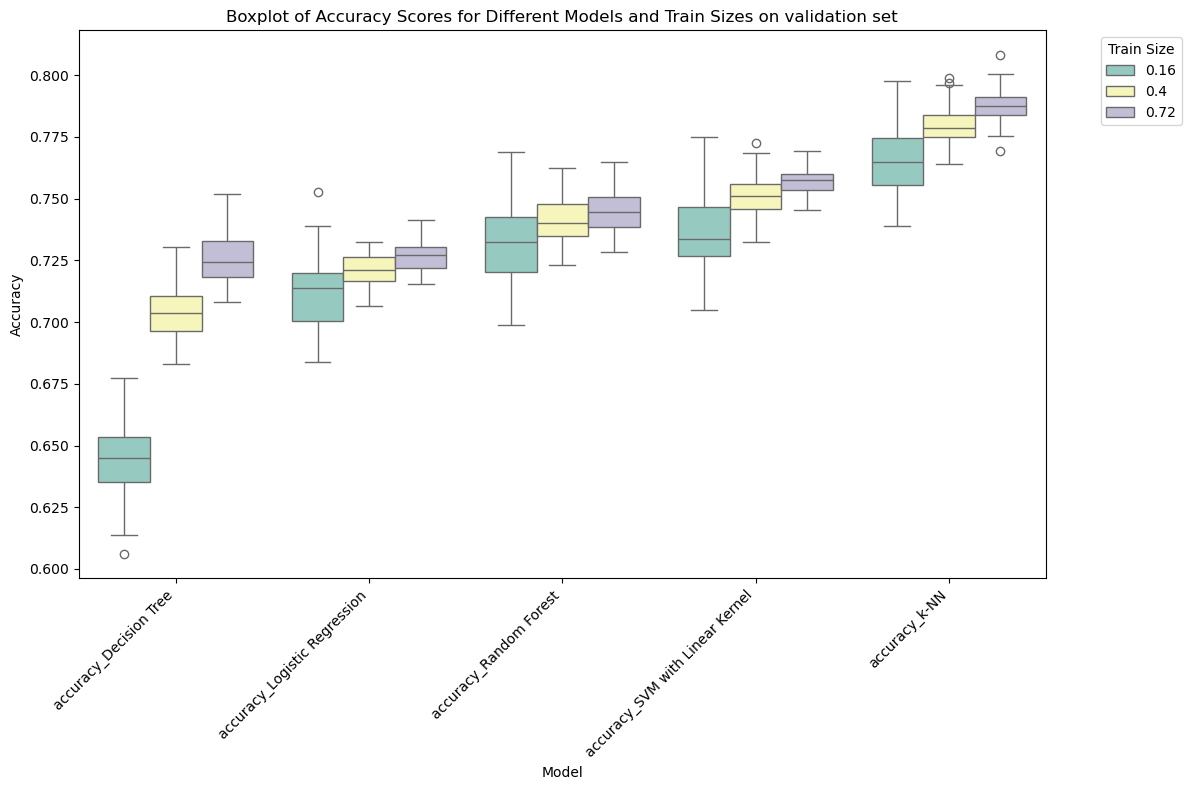

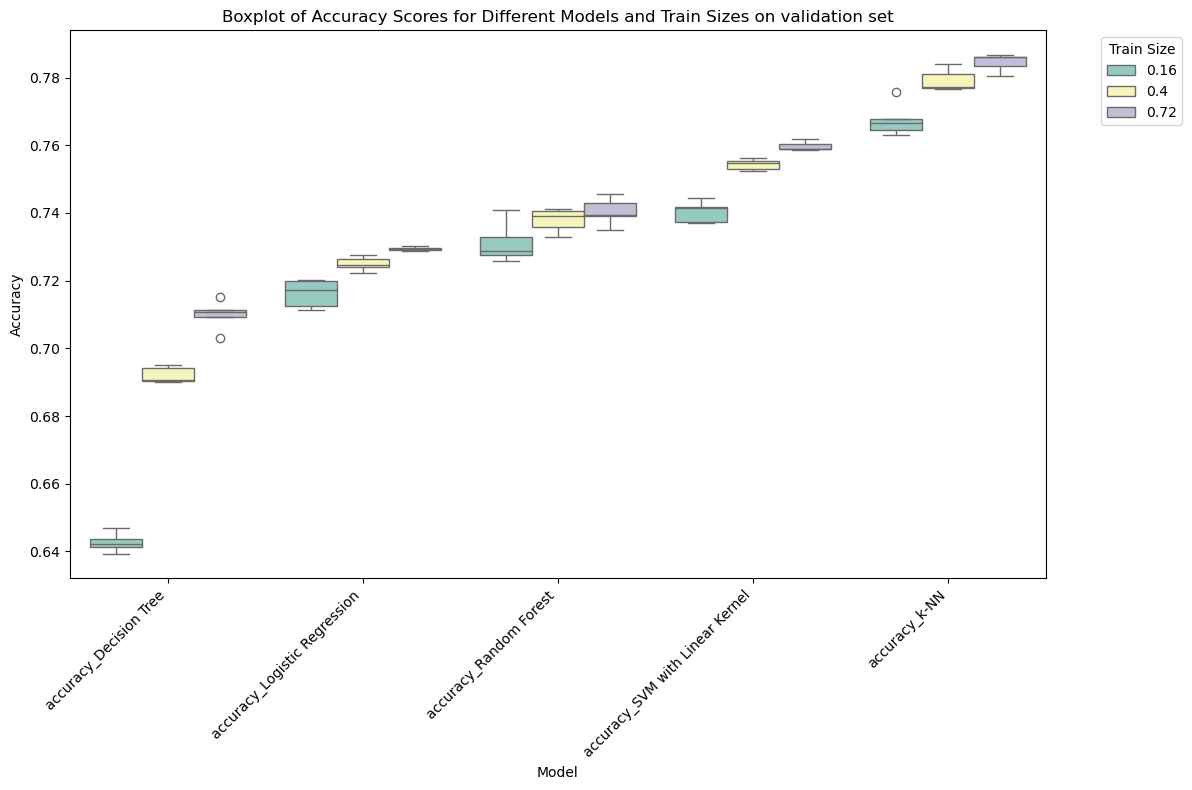

In [21]:
def plot_acc(df):
    df["train_size"] = df["train_size"].round(2)
    f1_columns = [col for col in df.columns if 'accuracy' in col]
    
    # Filter relevant F1 columns and ensure 'train_size' is included
    df_filtered = df[['train_size'] + f1_columns]
    
    # Melt the dataframe to have a long-form dataframe suitable for seaborn boxplot
    df_melted = df_filtered.melt(id_vars='train_size', value_vars=f1_columns, var_name='Model', value_name='Accuracy')
    
    # Plot the boxplot with different train sizes in the same plot
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Model', y='Accuracy', hue='train_size', data=df_melted, palette='Set3')
    plt.xticks(rotation=45, ha='right')
    plt.title('Boxplot of Accuracy Scores for Different Models and Train Sizes on validation set')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.legend(title='Train Size', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    
    
    
plot_acc(df)
plot_acc(df_test)




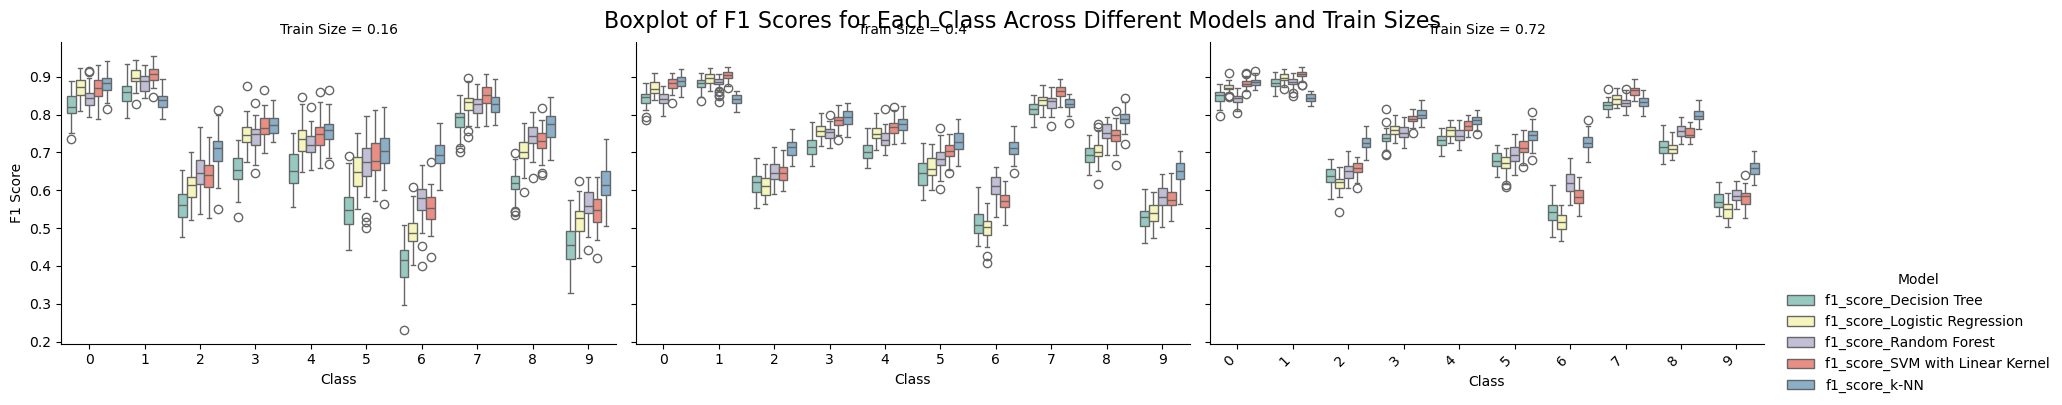

In [22]:
def expand_f1_scores(df):
    # Create an empty DataFrame to hold the expanded data
    expanded_data = {
        'train_size': [],
        'Model': [],
        'Class': [],
        'F1': [],
    }
    
    for index, row in df.iterrows():
        train_size = row['train_size']
        for col in df.columns:
            if 'f1_score' in col:
                model = col
                f1_scores = row[col]
                for class_idx, f1_scor in enumerate(f1_scores):
                    expanded_data['train_size'].append(train_size)
                    expanded_data['Model'].append(model)
                    expanded_data['Class'].append(class_idx)
                    expanded_data['F1'].append(f1_scor)
    
    expanded_df = pd.DataFrame(expanded_data)
    return expanded_df

def plot_class_f1(df):
    temp_df = df.copy()
    expanded_df = expand_f1_scores(temp_df)
    
    # Create a FacetGrid for plotting F1 scores by train size
    g = sns.FacetGrid(expanded_df, col="train_size", col_wrap=3, height=4, aspect=1.5)
    g.map_dataframe(sns.boxplot, x='Class', y='F1', hue='Model', palette='Set3')
    
    # Set axis labels and titles
    g.set_axis_labels("Class", "F1 Score")
    g.set_titles("Train Size = {col_name}")
    g.add_legend(title="Model", loc='lower right')
    
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('Boxplot of F1 Scores for Each Class Across Different Models and Train Sizes', fontsize=16)
    plt.show()
    

plot_class_f1(df)

In [23]:

def expand_df(df):
    exploded_cols = []
    indices = []
    for v in df["true_labels_Decision Tree"]:
        indices.extend(v.index)
    
    for col in df.columns:
        if ('predictions' in col or 'true_labels' in col) and "mispredictions" not in col:

            exploded_cols.append(df[[col]].explode(col).reset_index(drop=True))
    
    temp_df = pd.concat(exploded_cols, axis=1)
    temp_df["true_labels"] = temp_df["true_labels_Decision Tree"]
    
    temp_df["index"] = indices
    temp_df.drop(columns=[f"true_labels_{model}" for model in ["Decision Tree", "Logistic Regression", "Random Forest", "SVM with Linear Kernel", "k-NN"]], inplace=True)
    return temp_df
    
    # expand train_size
    # temp_df['train_size'] = df['train_size']
    

temp_df = expand_df(df)



In [24]:
temp_df

,predictions_Decision Tree,predictions_Logistic Regression,predictions_Random Forest,predictions_SVM with Linear Kernel,predictions_k-NN,true_labels,index
0,8,3,6,8,3,8,30676
1,9,9,4,9,9,9,35460
2,5,8,5,5,5,9,25560
3,7,7,7,7,7,7,2533
4,1,1,1,1,1,1,38490
...,...,...,...,...,...,...,...
319995,9,7,7,7,7,7,44599
319996,7,7,7,7,7,7,40107
319997,0,0,0,0,0,0,16690
319998,4,4,4,4,7,7,12999


In [25]:
def find_common_misspredictions(row):
    # return True if all models disagree with the correct label
    first_model = list(results.keys())[0]
    first_prediction = row[f"predictions_{first_model}"]

    if (all(first_prediction == row[f"predictions_{model}"] for model in ["Decision Tree", "Logistic Regression", "Random Forest", "SVM with Linear Kernel", "k-NN"]) and

        first_prediction != row["true_labels"]):
        return True
    return False

def find_correct_predictions(row):
    # return True if all models agree with the correct label
    first_model = list(results.keys())[0]
    first_prediction = row[f"predictions_{first_model}"]

    if (all(first_prediction == row[f"predictions_{model}"] for model in ["Decision Tree", "Logistic Regression", "Random Forest", "SVM with Linear Kernel", "k-NN"]) and

        first_prediction == row["true_labels"]):
        return True
    return False

maybe_miss = temp_df[temp_df.apply(find_common_misspredictions, axis=1)]

In [150]:


def plot_images(images, labels, predictions, idx: list):
    fig, axes = plt.subplots(1, len(idx), figsize=(20, 4))
    for i, ind in enumerate(idx):
        axes[i].imshow(images.loc[ind].values.reshape(28, 28), cmap='gray')
        axes[i].set_title(labels.loc[ind])
        axes[i].set_xticks([])  # Remove x-axis ticks
        axes[i].set_yticks([])  # Remove y-axis ticks
        axes[i].set_xlabel(f"Predicted: {predictions[i]}")  # Add predicted label as subtitle
        # axes[i].axis('off')
    plt.show()



# random_rows = np.random.choice(maybe_miss.index, 10)

# prediction = maybe_miss.loc[random_rows]["predictions_Decision Tree"].tolist()
# indices = maybe_miss.loc[random_rows]["index"]
# print(indices)

# plot_images(images, labels, prediction, indices)

In [279]:

37878 # pred 1

49355 #pred 1

20114 # pred 4

26022 # pred 6

17476 # pred 2

16622 # pred 9

16397 # pred 1



26022

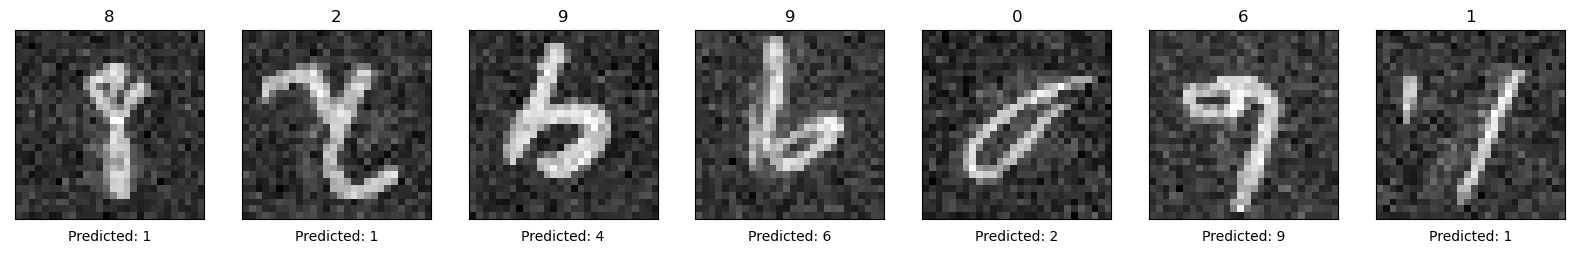

In [151]:
prediction = [1, 1, 4, 6, 2, 9, 1]
plot_images(images, labels, prediction, [37878, 49355, 20114, 26022, 17476, 16622, 16397])

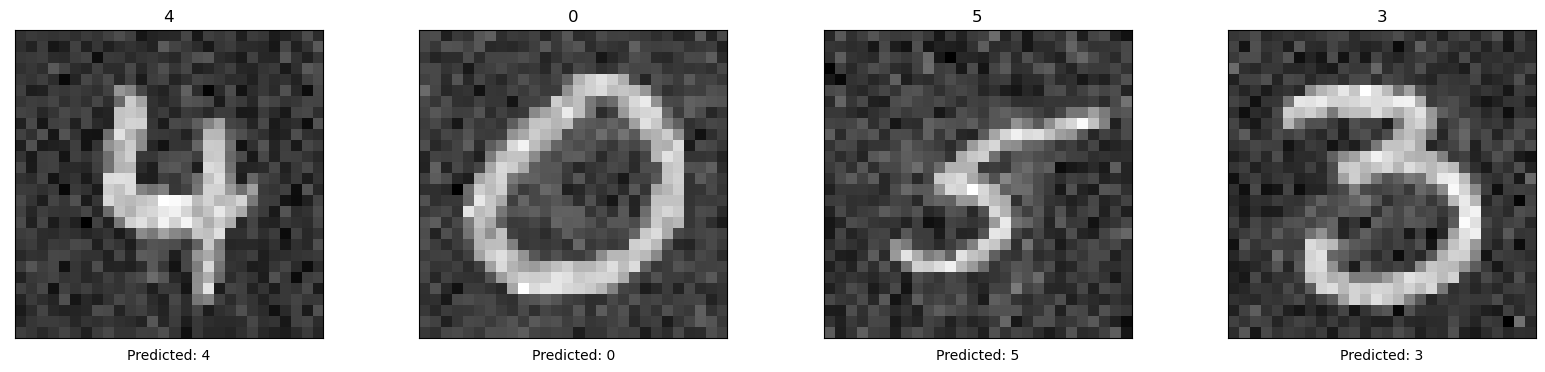

In [289]:
prediction = [4, 0, 5, 3]

plot_images(images, labels, prediction, [35928, 17731, 42313, 34364])

## c)

In [36]:
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
from sklearn.cluster import BisectingKMeans

from sklearn.cluster import KMeans, MiniBatchKMeans, HDBSCAN


file_path = 'data/MyMNIST.csv'
data = pd.read_csv(file_path)

images = data.iloc[:, 1:]
labels = data.iloc[:, 0]


del data # remove

print("Distribution of classes: ", np.bincount(labels))
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.8, stratify=labels, random_state=42)
# print("Distribution of classes in training set: ", np.bincount(y_train))

# reducer =  SelectKBest(f_classif, k=100)
# reduced = reducer.fit_transform(X_train, y_train)

# reduced_test = reducer.transform(X_test)

# reduced = reducer.fit_transform(images, labels)
# reduced, algo = incremental_pca(reduced, 50)


reduced, algo = incremental_pca(images, 50)

print(algo.explained_variance_ratio_.sum())

Distribution of classes:  [4915 5621 4971 5129 4847 4545 4920 5211 4910 4931]


In [71]:
def plot_images_from_clusters(images, labels, cluster_labels, n=10):
    for cluster_number in np.unique(cluster_labels):
        fig, axes = plt.subplots(1, n, figsize=(20, 4))
        cluster_indices = np.where(cluster_labels == cluster_number)[0]
        random_indices = np.random.choice(cluster_indices, size=n, replace=False)
        for i, idx in enumerate(random_indices):
            axes[i].imshow(images.loc[idx].values.reshape(28, 28), cmap='gray')
            axes[i].set_title(labels.loc[idx])
            axes[i].set_xticks([])  # Remove x-axis ticks
            axes[i].set_yticks([])  # Remove y-axis ticks
            axes[i].set_xlabel(f"Cluster: {cluster_number}")
        plt.show()

Adjusted Rand Index for KMeans: 0.2335502318942705
Adjusted Mutual Information for KMeans: 0.35345152374358196


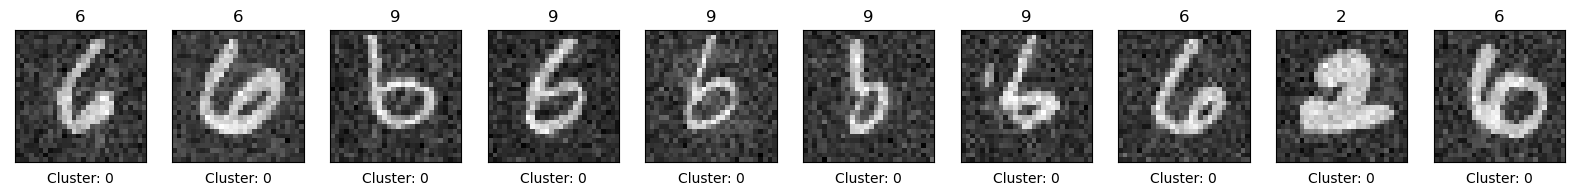

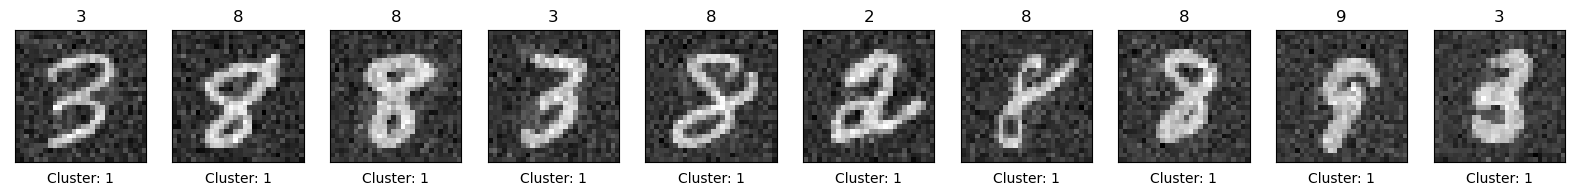

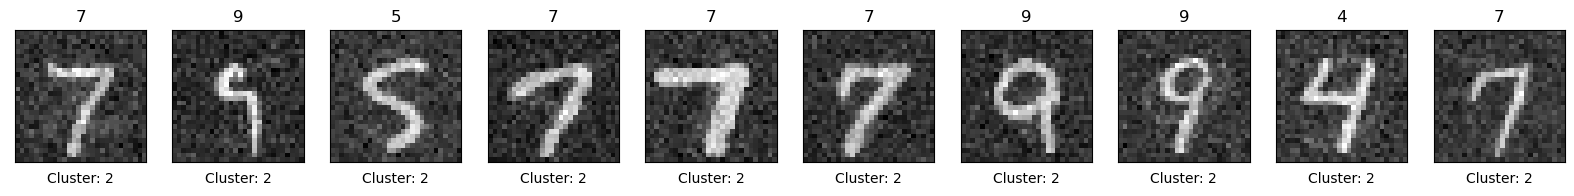

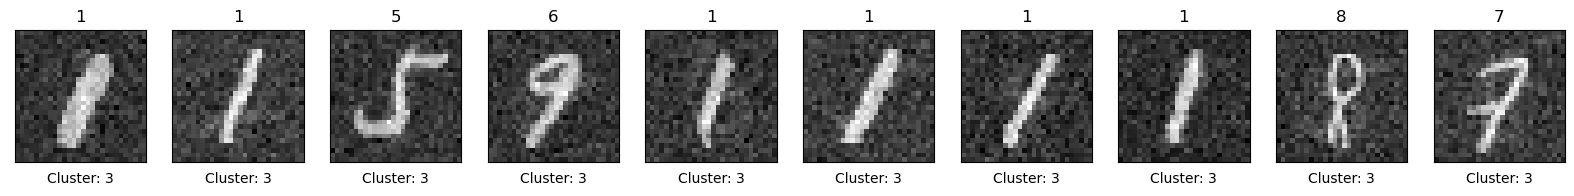

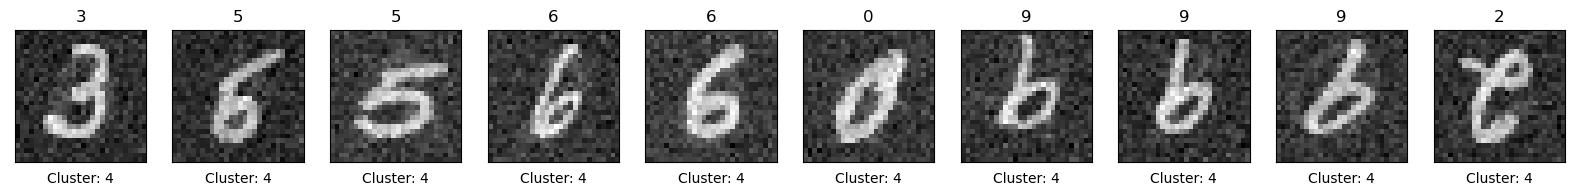

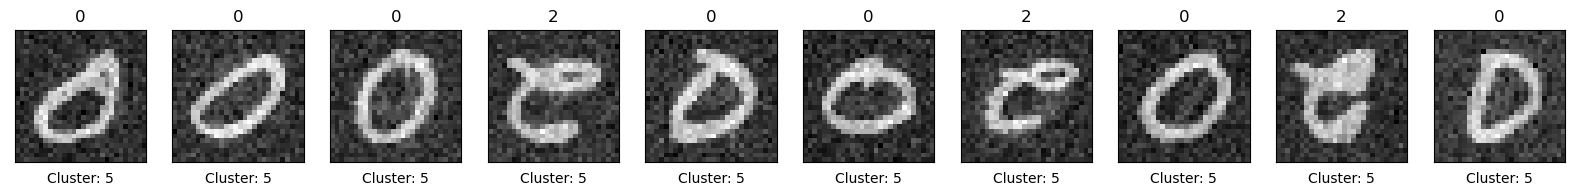

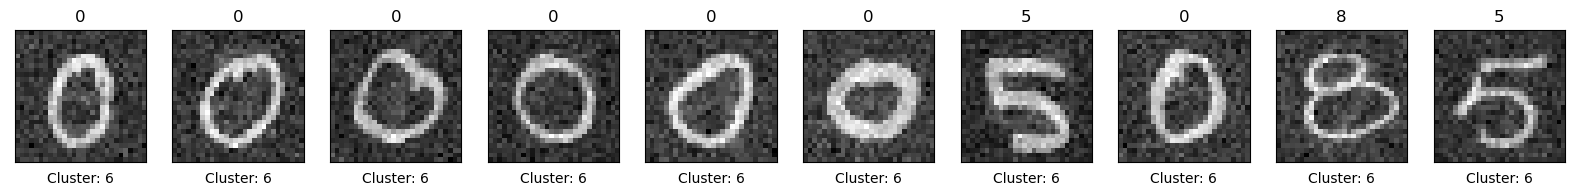

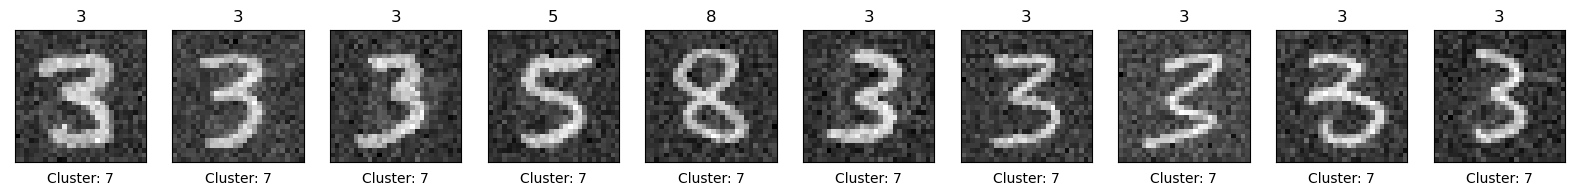

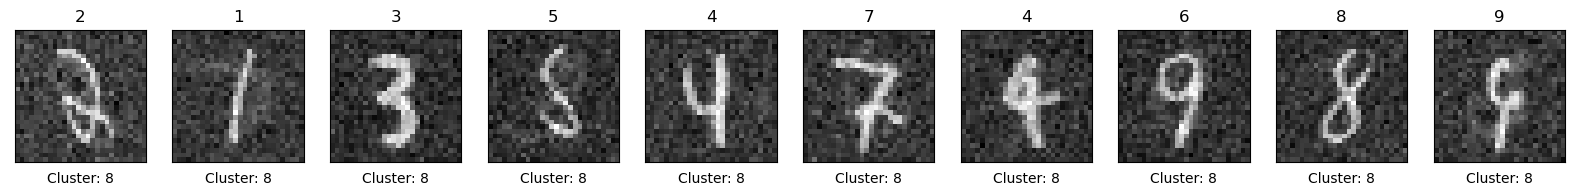

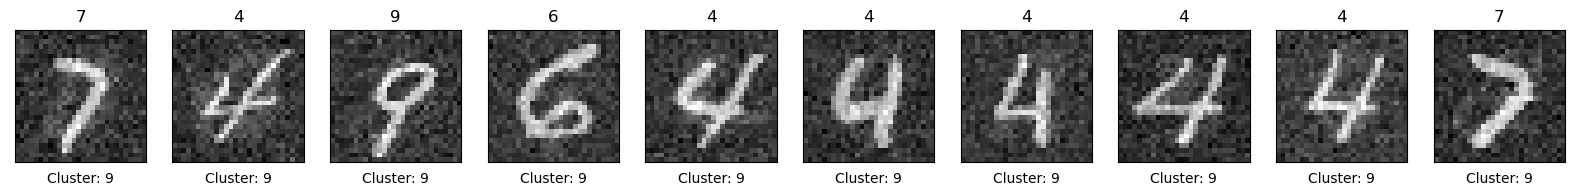

In [69]:
kmeans = MiniBatchKMeans(n_clusters=10)

cluster_labels = kmeans.fit_predict(reduced)

ari_kmeans = adjusted_rand_score(labels, cluster_labels)
ami_kmeans = adjusted_mutual_info_score(labels, cluster_labels)




print(f"Adjusted Rand Index for KMeans: {ari_kmeans}")
print(f"Adjusted Mutual Information for KMeans: {ami_kmeans}")

plot_images_from_clusters(images, labels, cluster_labels, n=10)

In [46]:
hdbscan = HDBSCAN(min_cluster_size=20, min_samples=5, n_jobs=-1)
cluster_labels_hdbscan = hdbscan.fit_predict(reduced)

In [48]:
Counter(cluster_labels_hdbscan)

Counter({-1: 41741,
         6: 23,
         16: 5143,
         5: 435,
         17: 506,
         3: 1349,
         13: 248,
         7: 99,
         12: 102,
         9: 33,
         4: 22,
         11: 28,
         10: 39,
         14: 64,
         8: 42,
         15: 52,
         0: 30,
         1: 20,
         2: 24})

In [85]:
ami_scores = {"HDBSCAN": [], "HDBSCAN_filtered": [], "KMeans": [], "BisectingKMeans": []}
ari_scores = {"HDBSCAN": [], "HDBSCAN_filtered": [], "KMeans": [], "BisectingKMeans": []}

for _ in range(10):
    method = HDBSCAN(min_cluster_size=20, min_samples=5, n_jobs=-1)
    cluster_labels = method.fit_predict(reduced)
    
    ami = adjusted_mutual_info_score(labels, cluster_labels)
    ami_scores["HDBSCAN"].append(ami)
    
    ari = adjusted_rand_score(labels, cluster_labels)
    ari_scores["HDBSCAN"].append(ari)
    
    non_noise_indices = np.where(cluster_labels != -1)[0] # filter out noise points
    ami = adjusted_mutual_info_score(labels[non_noise_indices], cluster_labels[non_noise_indices])
    ami_scores["HDBSCAN_filtered"].append(ami)
    
    ari = adjusted_rand_score(labels[non_noise_indices], cluster_labels[non_noise_indices])
    ari_scores["HDBSCAN_filtered"].append(ari)
    
    method = MiniBatchKMeans(n_clusters=8)
    cluster_labels = method.fit_predict(reduced)
    
    ami = adjusted_mutual_info_score(labels, cluster_labels)
    ami_scores["KMeans"].append(ami)
    
    ari = adjusted_rand_score(labels, cluster_labels)
    ari_scores["KMeans"].append(ari)
    
    method = BisectingKMeans(n_clusters=8)
    cluster_labels = method.fit_predict(reduced)
    
    ami = adjusted_mutual_info_score(labels, cluster_labels)
    ami_scores["BisectingKMeans"].append(ami)
    
    ari = adjusted_rand_score(labels, cluster_labels)
    ari_scores["BisectingKMeans"].append(ari)
    
    

In [ ]:
ari_scores_df = pd.DataFrame(ari_scores)
ami_scores_df = pd.DataFrame(ami_scores)
ari_scores_df.mean()

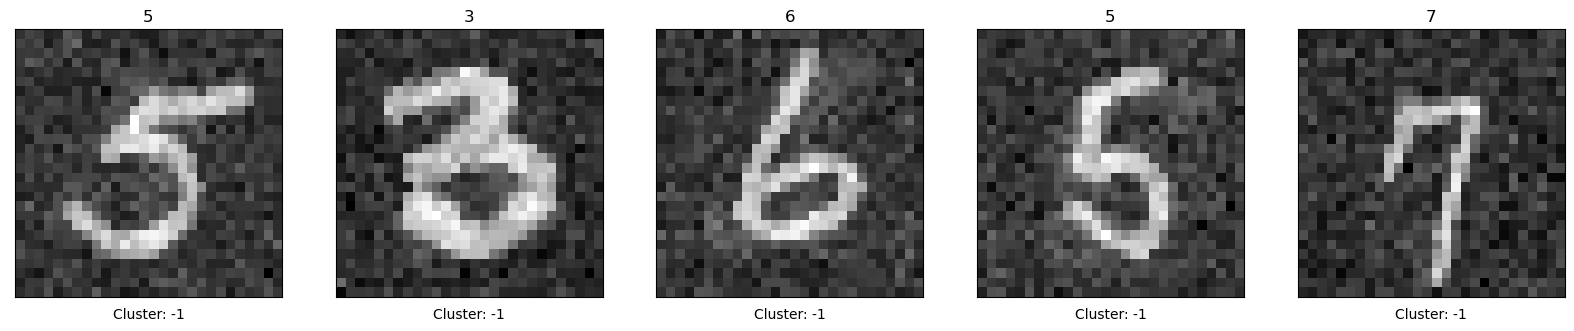

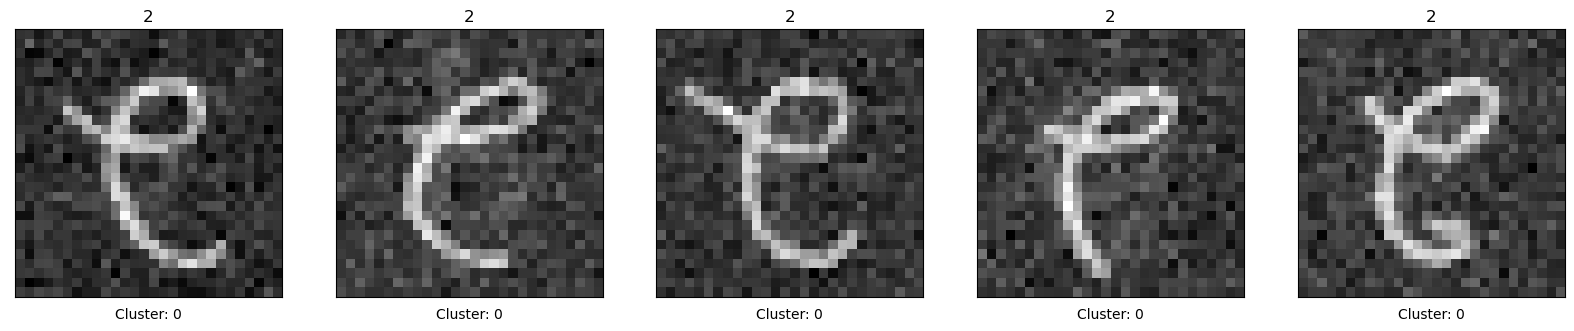

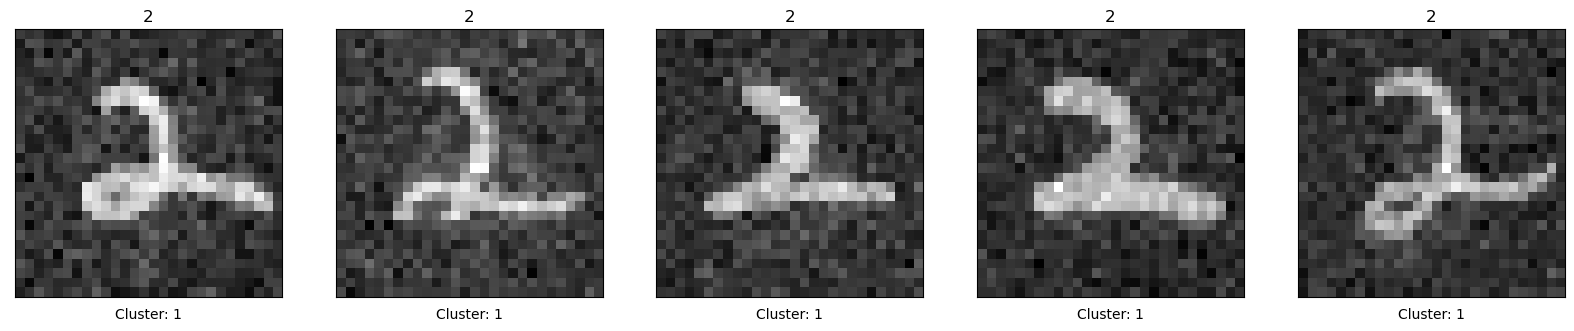

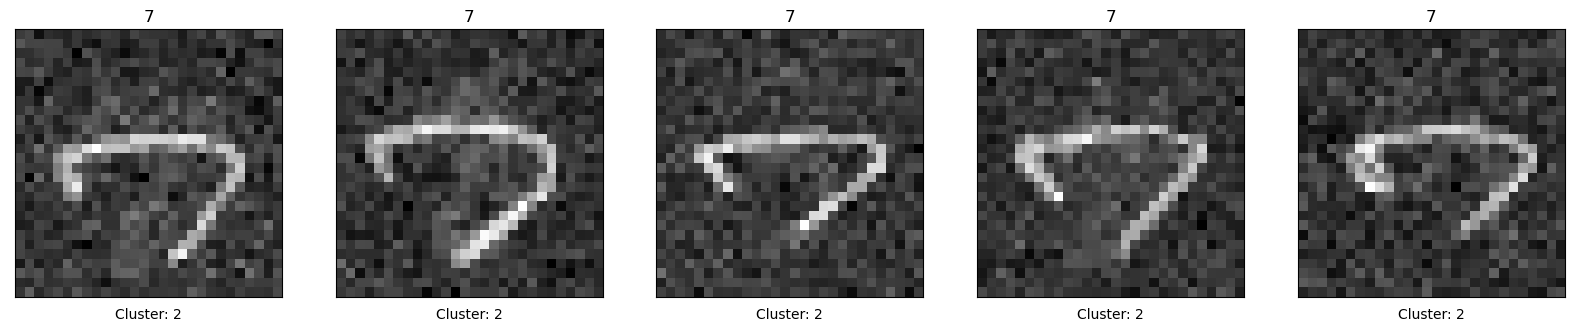

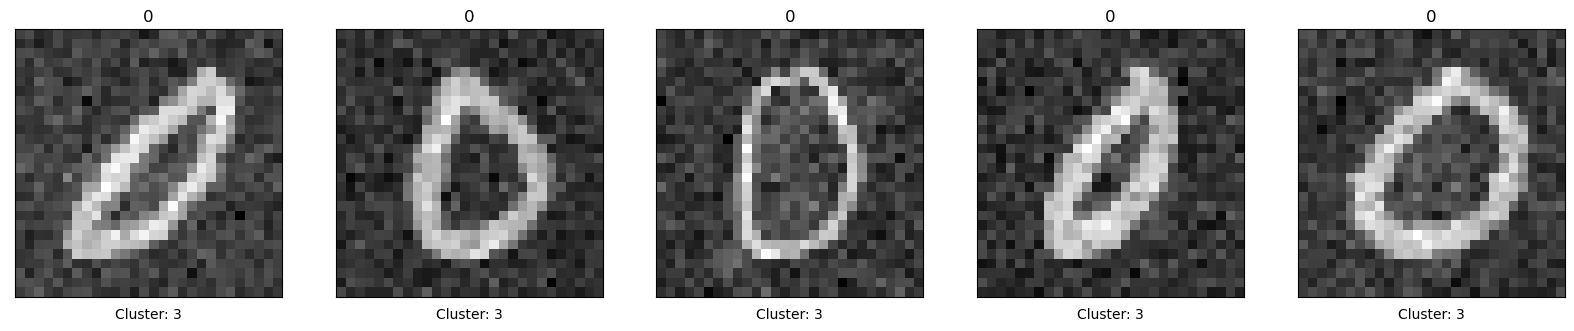

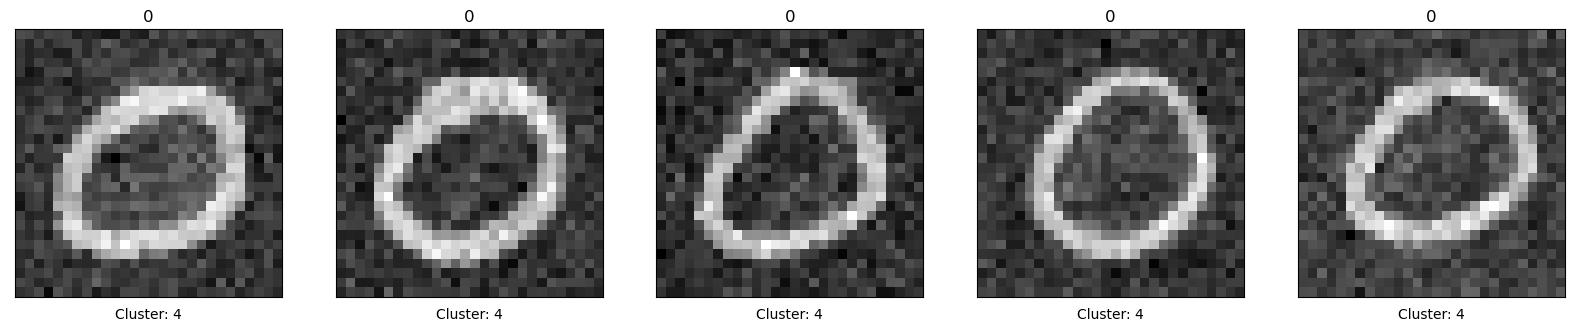

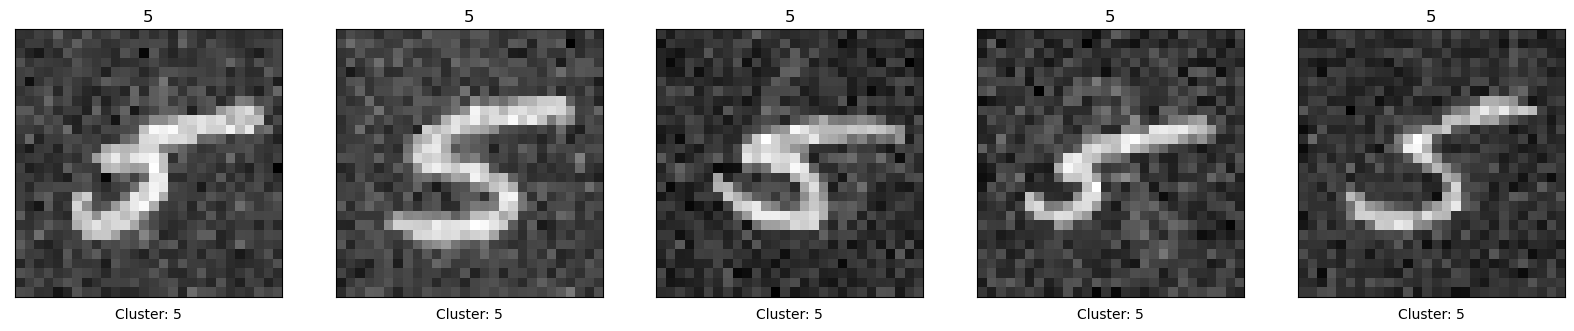

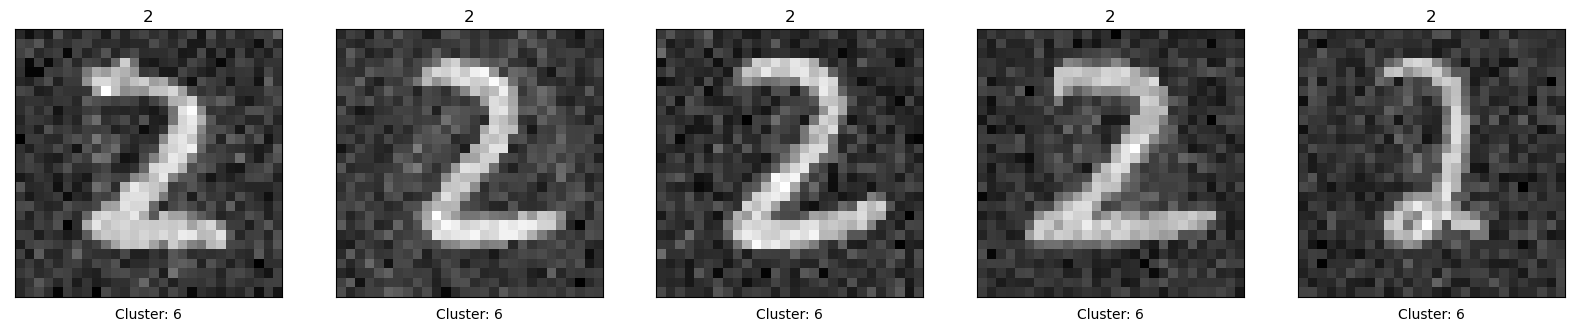

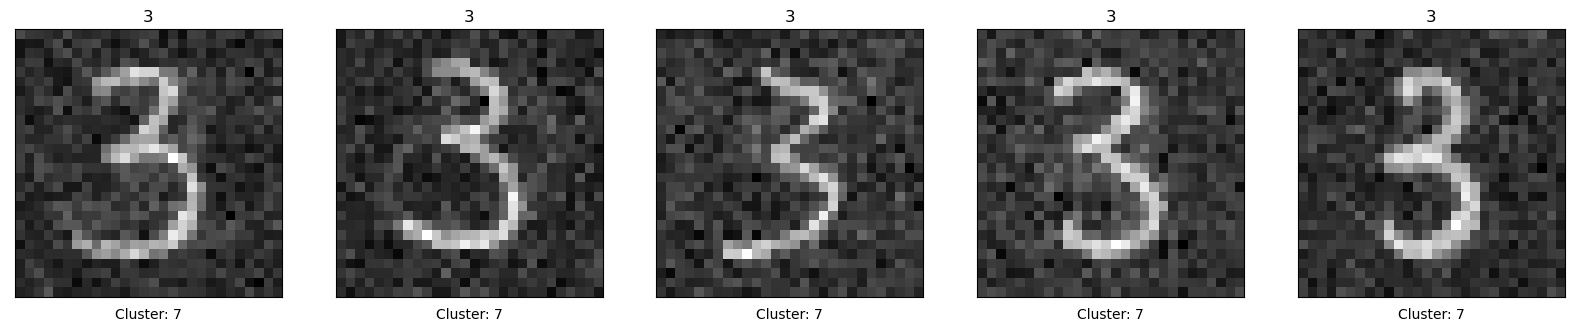

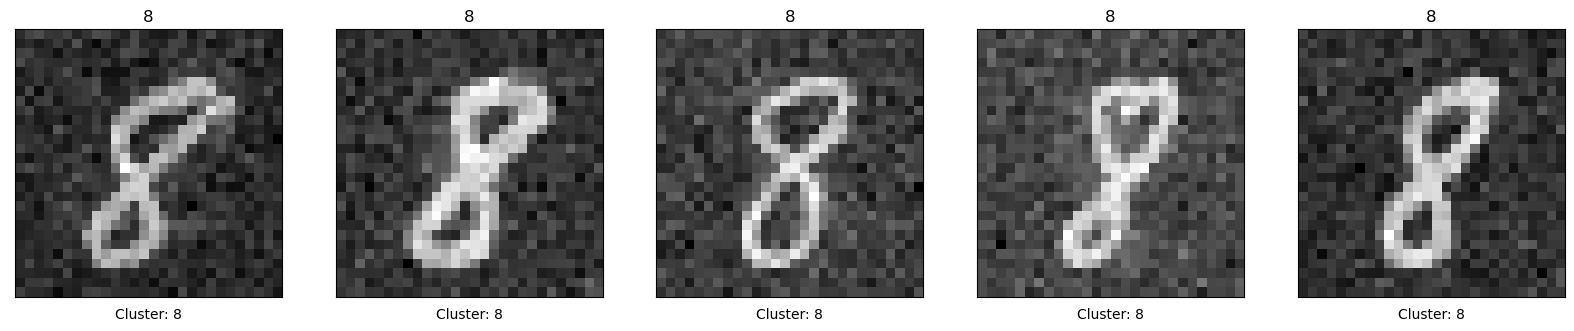

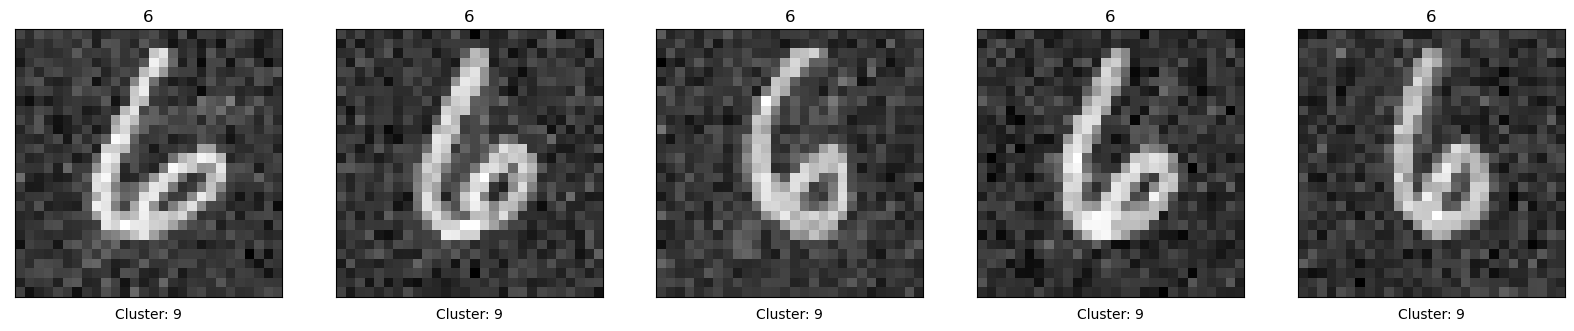

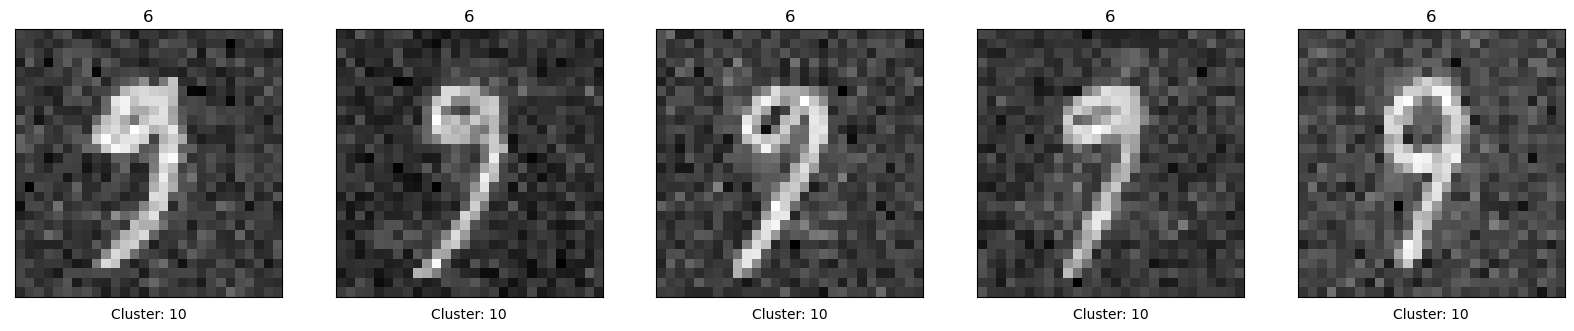

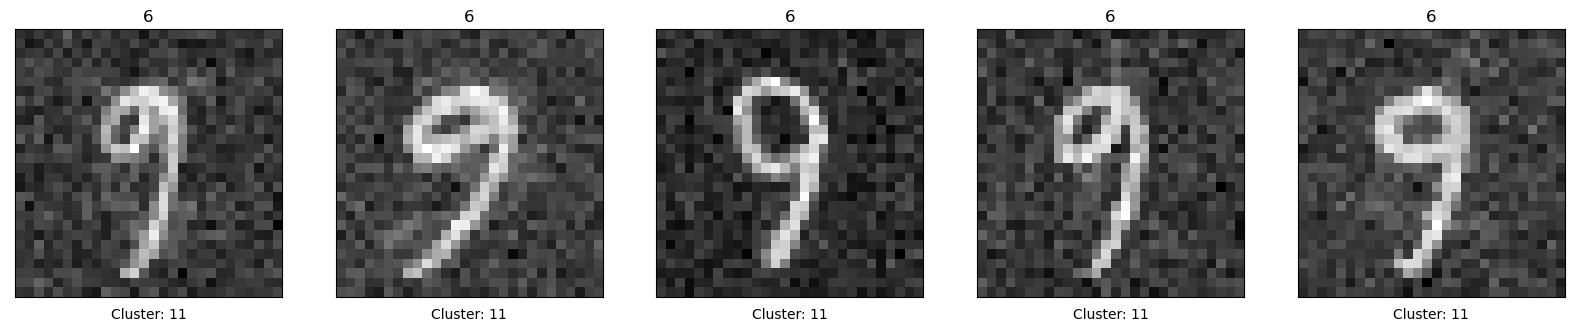

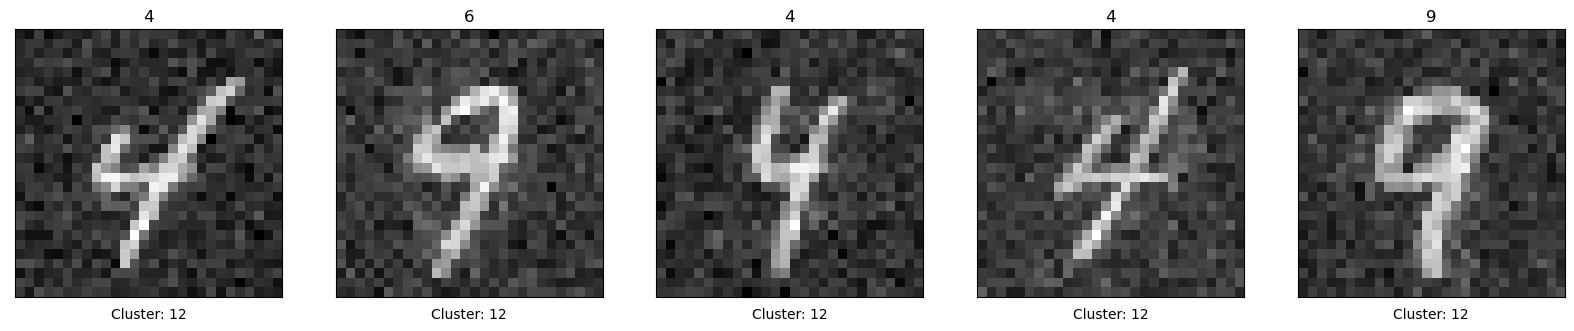

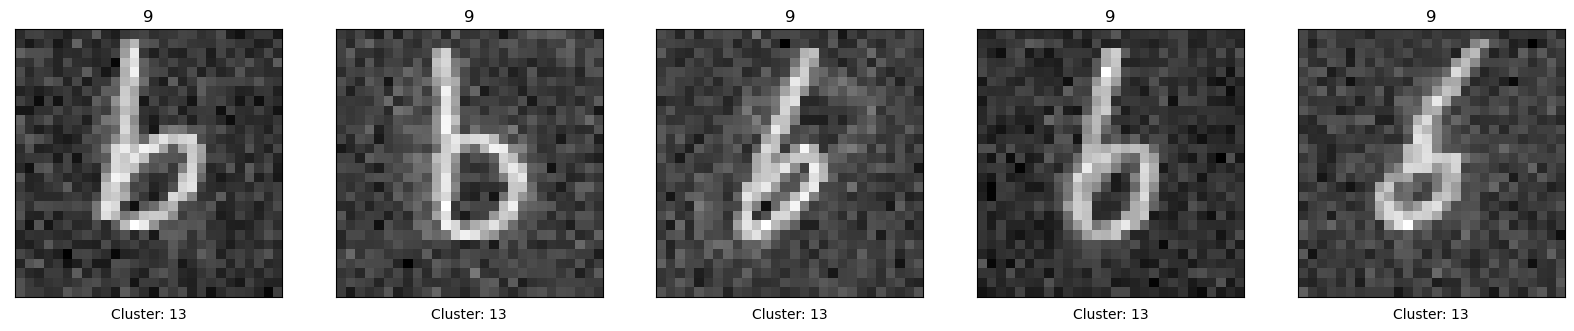

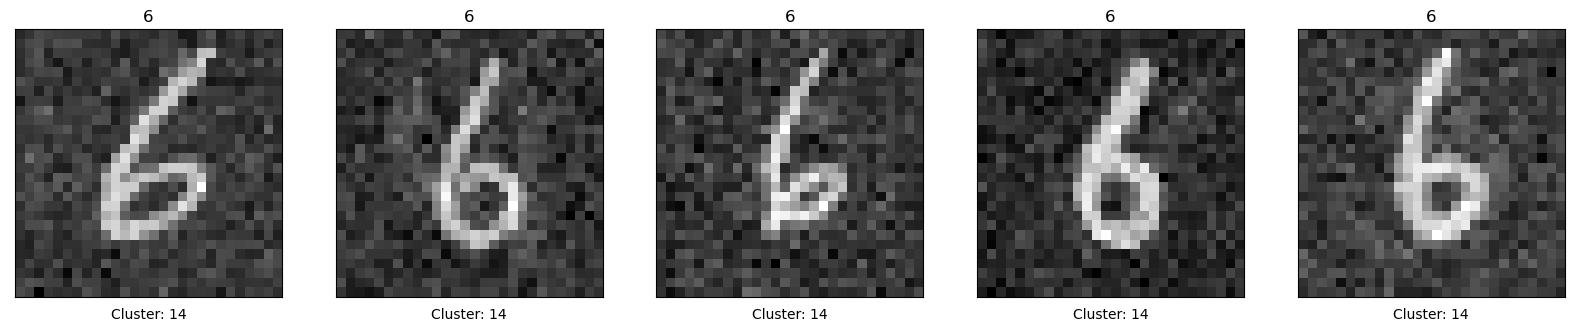

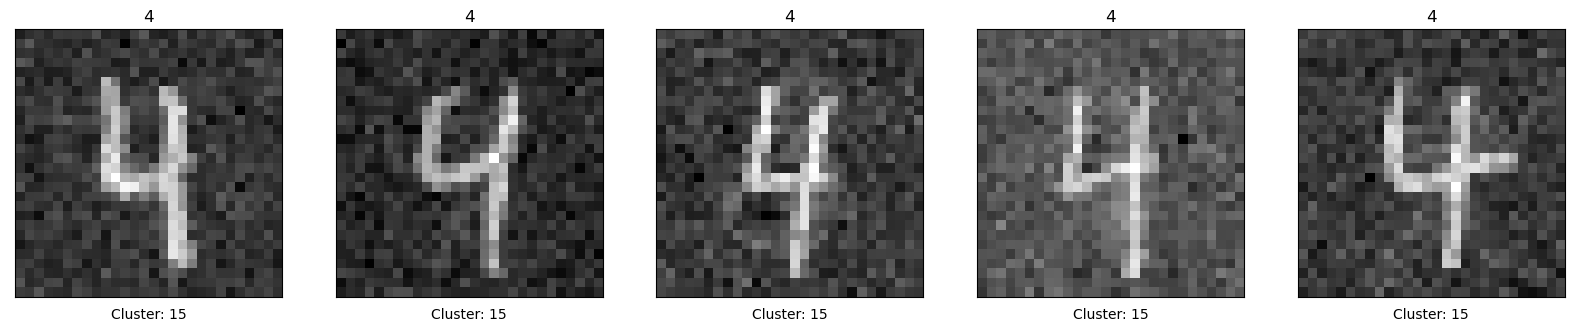

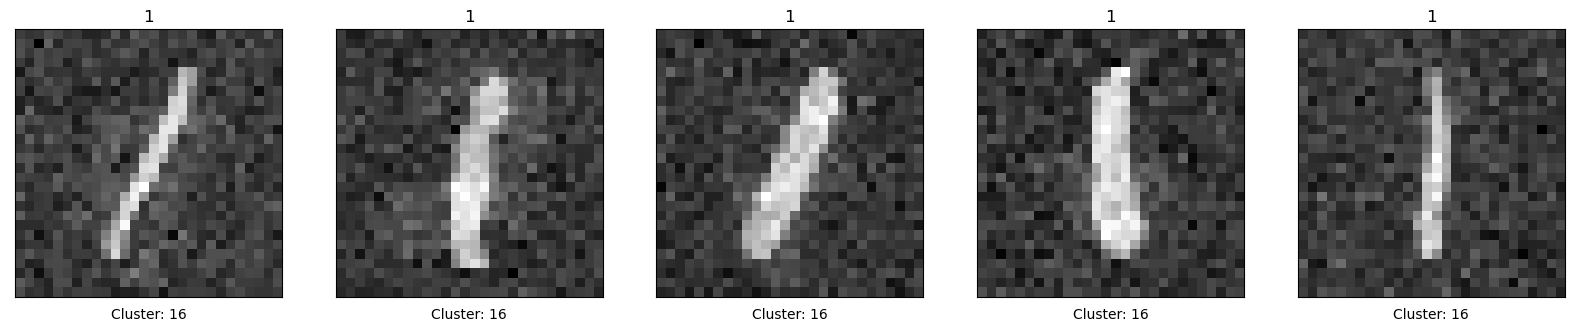

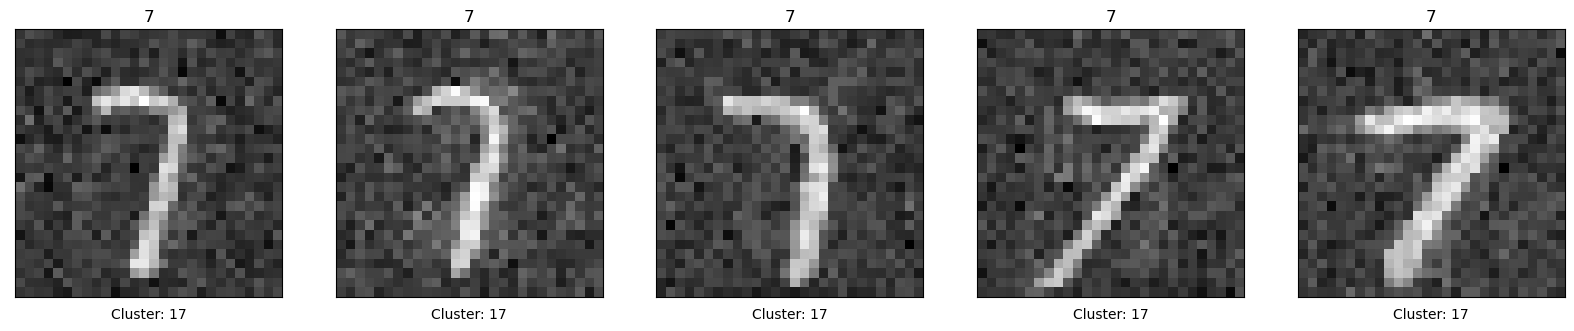

In [73]:
plot_images_from_clusters(images, labels, cluster_labels_hdbscan, n=5)

Adjusted Rand Index for Bisecting KMeans: 0.18687299892198456
Adjusted Mutual Information for Bisecting KMeans: 0.2881296742912008


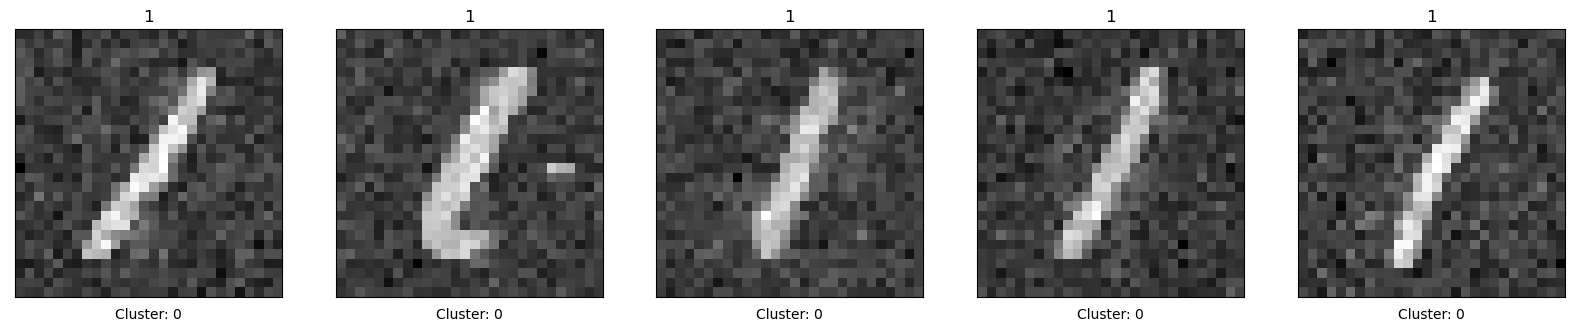

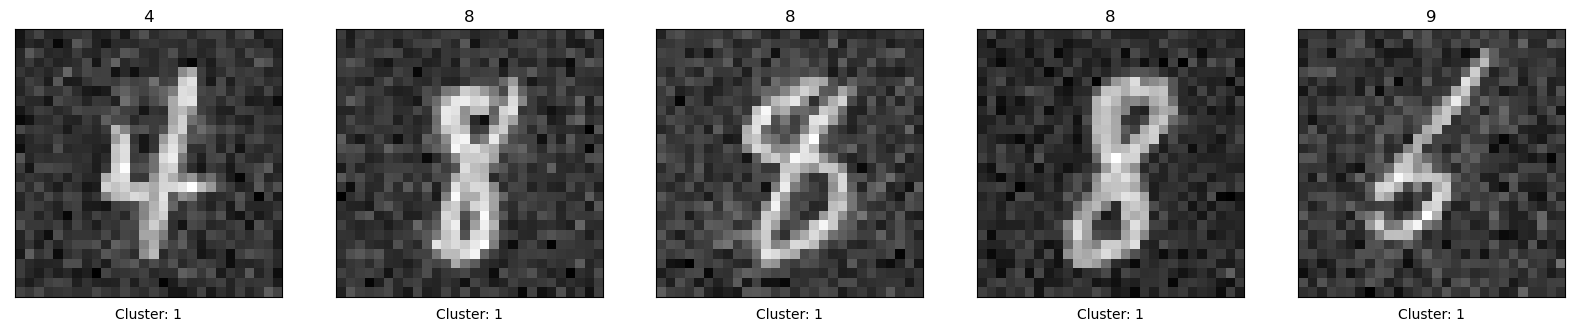

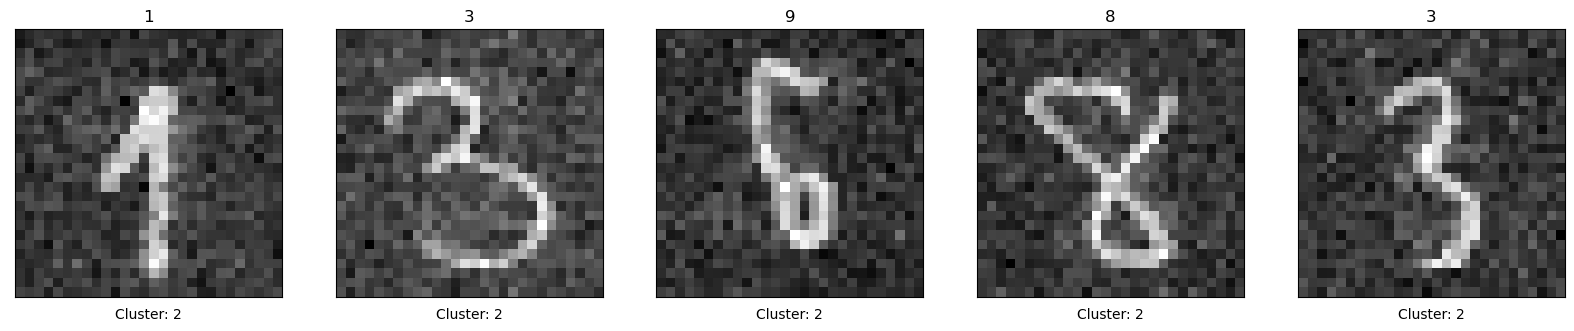

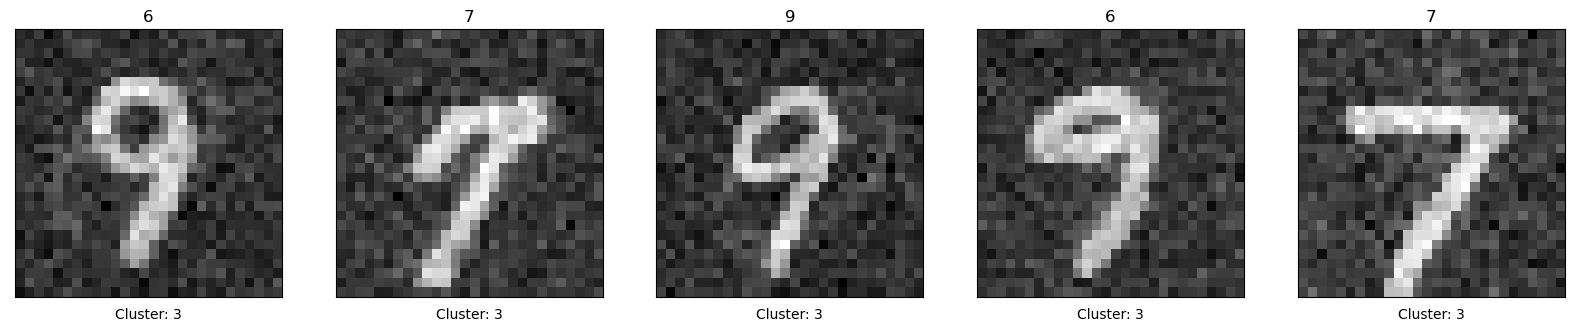

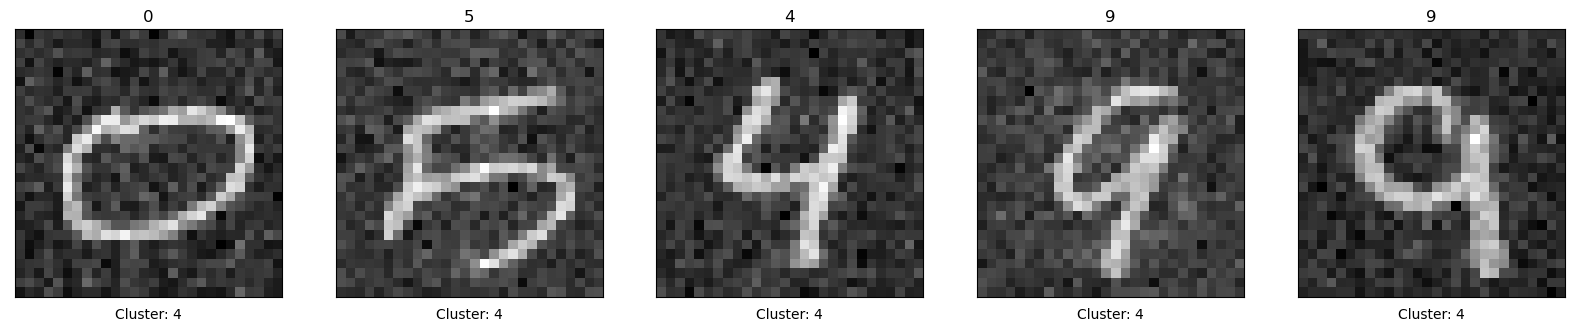

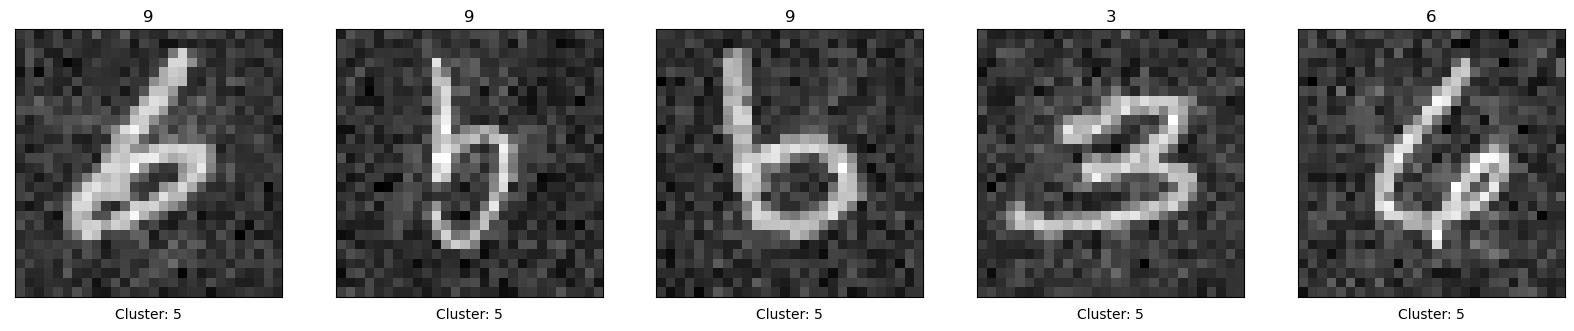

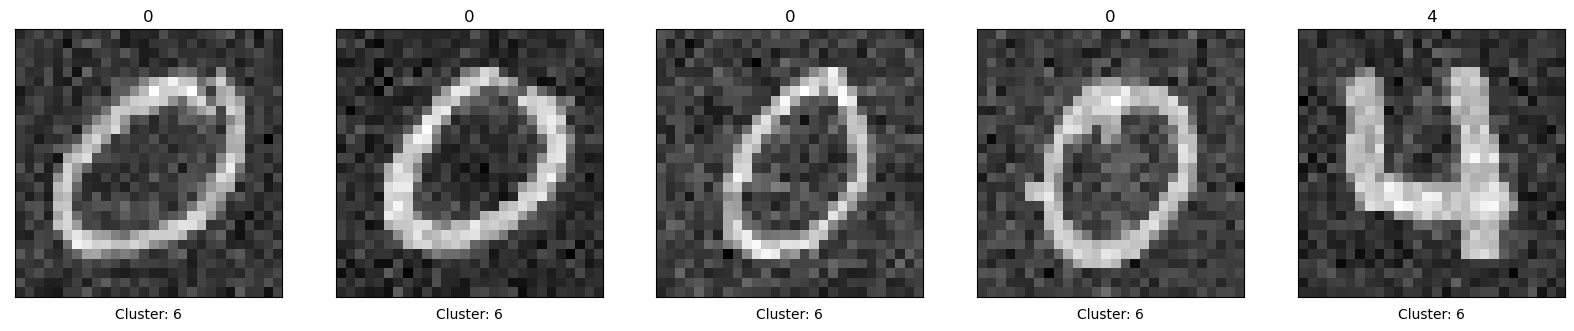

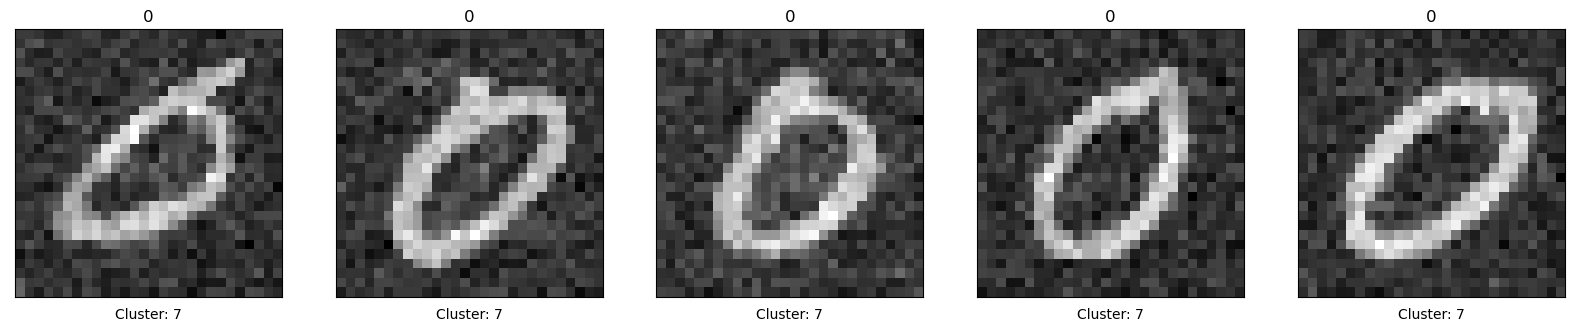

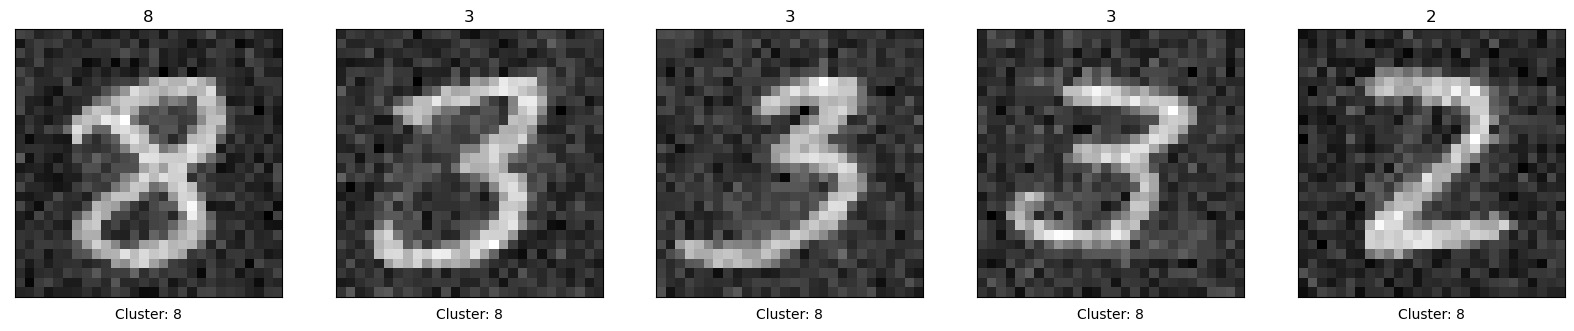

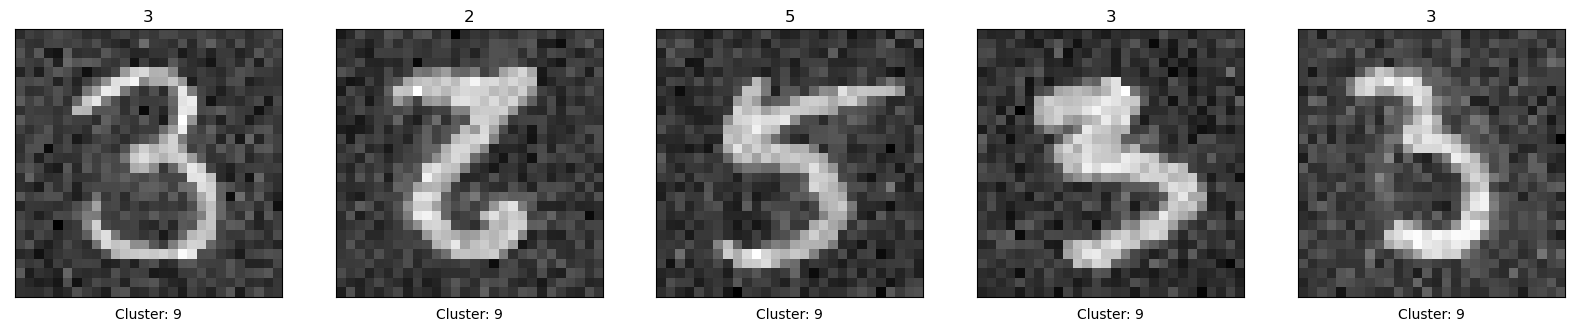

In [91]:



bisect = BisectingKMeans(n_clusters=10, bisecting_strategy="largest_cluster")

cluster_labels_bisect = bisect.fit_predict(reduced)

print(f"Adjusted Rand Index for Bisecting KMeans: {adjusted_rand_score(labels, cluster_labels_bisect)}")
print(f"Adjusted Mutual Information for Bisecting KMeans: {adjusted_mutual_info_score(labels, cluster_labels_bisect)}")

plot_images_from_clusters(images, labels, cluster_labels_bisect, n=5)

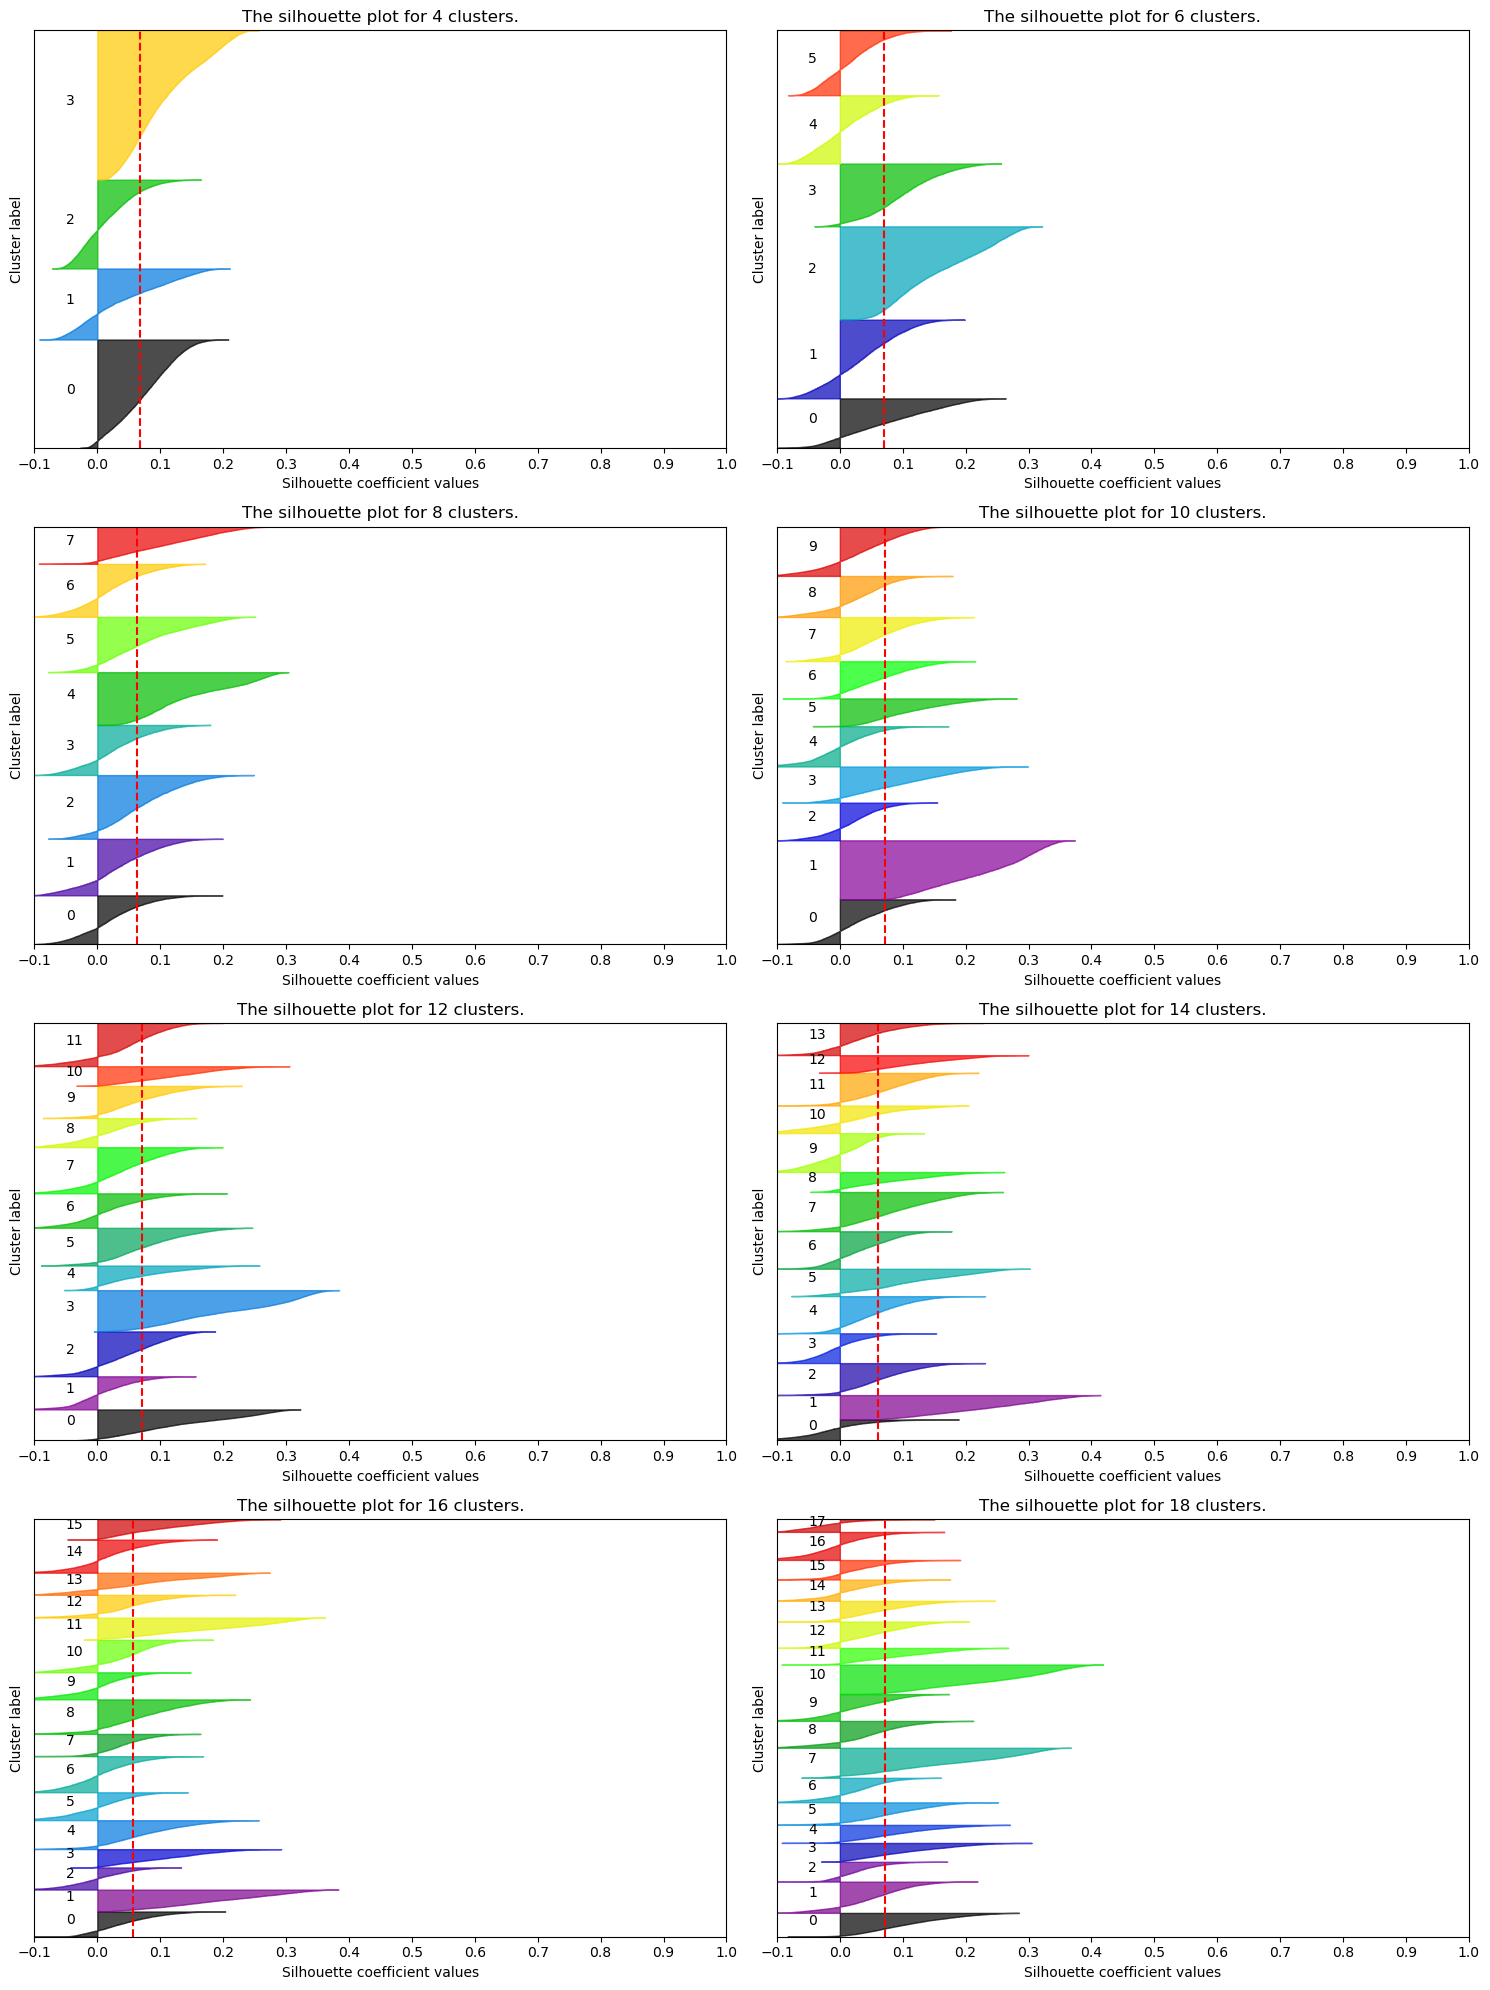

In [79]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def plot_silhouette(X, cluster_labels, n_clusters):
    n_clusters_list = range(4, 20, 2)
    n_plots = len(n_clusters_list)
    n_cols = 2
    n_rows = (n_plots + 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axs = axs.flatten()  # Flatten the array of axes for easy iteration

    for ax, n_clusters in zip(axs, n_clusters_list):
        kmeans = MiniBatchKMeans(n_clusters=n_clusters)
        cluster_labels = kmeans.fit_predict(X)
        
        # Calculate silhouette scores
        silhouette_avg = silhouette_score(X, cluster_labels)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        # Plot silhouette values
        ax.set_xlim([-0.1, 1])
        ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax.set_title(f"The silhouette plot for {n_clusters} clusters.")
        ax.set_xlabel("Silhouette coefficient values")
        ax.set_ylabel("Cluster label")

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax.set_yticks([])
        ax.set_xticks([i / 10.0 for i in range(-1, 11)])

    # Hide any remaining axes if the number of plots is odd
    for ax in axs[n_plots:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()


plot_silhouette(reduced, cluster_labels, 7)

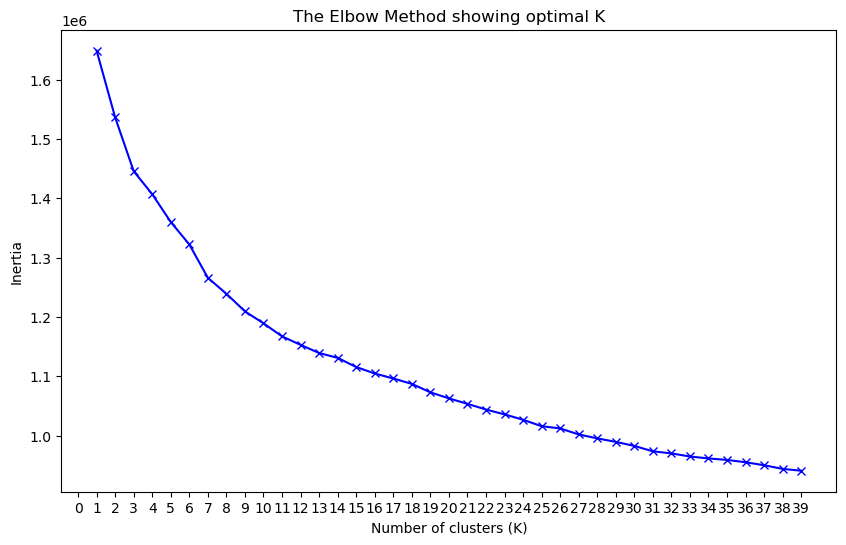

In [82]:


# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 40)  # test for K values from 1 to 20
for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.xticks(range(40))
plt.ylabel('Inertia')
plt.title('The Elbow Method showing optimal K')
plt.show()